# DATA5000 A3: AI Causal Models and Large Language Model Forecasting Project


# Section 1

# Import Python Libraries

In [1]:
# we will use lightGBM machine learner instead of XGBoost
%pip install econml lightgbm #installing ML and casual inference packages

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 29.6 MB/s eta 0:00:00


In [2]:
# Some imports to get us started
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap

%matplotlib inline

In [3]:
# this is the explainable machine learning library
%pip install shap #SHAP is used to describe how each feature contributes to the model understanding a models characterisitc

In [4]:
%pip install pandas numpy matplotlib seaborn sklearn plotly openpyxl numba lightgbm nbformat

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
%matplotlib inline

In [6]:
from openpyxl import Workbook #used to read excel files

# Section 2

### Data Description

The data contains the following features :

AUS_CPI_MONTHLY: this is the inflation rate for Australia, measured in percentages
See: https://www.rba.gov.au/inflation-overview.html
For comparison:
(1) Statista Forecasts: https://www.statista.com/statistics/271845/inflation-rate-in-australia/
(2) https://tradingeconomics.com/australia/inflation-cpi
(3) https://www.abs.gov.au/statistics/economy/price-indexes-and-inflation/consumer-price-index-australia/latest-release

GOLD_HIGH: the market price of gold, trading at $USD per ounce.
See: https://au.finance.yahoo.com/quote/GC%3DF?p=GC%3DF
See also: https://abcbullion.com.au/products-pricing/gold
(1) https://www.gold.org/
(2) https://www.fool.com/knowledge-center/how-do-gold-prices-affect-the-economy.aspx#:~:text=Currency%20markets,currencies%20have%20declined%20in%20value.
(3) https://www.investopedia.com/financial-edge/0311/what-drives-the-price-of-gold.aspx
(4) https://www.investopedia.com/articles/forex/11/golds-effect-currencies.asp

CRUDE OIL BENCHMARKS
====================
(1) BRENT: https://www.google.com/finance/quote/BZW00:NYMEX?sa=X&ved=2ahUKEwjyu9Dc1aWEAxU5k1YBHR5nDMEQ3ecFegQICBAX

https://www.marketwatch.com/investing/future/brn00?countrycode=uk

https://tradingeconomics.com/commodity/brent-crude-oil

(2) WTI: https://www.marketwatch.com/investing/future/cl.1

Troy ounce: https://www.royalmint.com/faqs/bullion/what-is-a-troy-ounce/#:~:text=A%20troy%20ounce%20is%20a,31.1034768%20grams%20or%200.0311034768%20kilograms.

COPPER: https://tradingeconomics.com/commodity/copper
SILVER: https://abcbullion.com.au/products-pricing/silver

US_FEDFUNDS:
(1) https://fred.stlouisfed.org/series/FEDFUNDS
(2) https://www.investopedia.com/terms/f/federalfundsrate.asp

AUS_GNI_TOT: Australian Gross National Income
(1) https://data.oecd.org/natincome/gross-national-income.htm
(2) https://www.investopedia.com/terms/g/gross-national-income-gni.asp

Australian Employment and Unemployment
======================================
See: https://www.abs.gov.au/statistics/labour/employment-and-unemployment
https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia/dec-2023

AUS_EMPLOY_TOPOP
AUS_PARTICIPATION_RATE
AUS_UNEMPLOY_PERSONS_PERCENT


Australian Monetary Aggregates
==============================
AUS_BROAD_MONEY_DMABMN:
https://www.investopedia.com/terms/b/broad-money.asp#:~:text=Broad%20money%20is%20a%20category,to%20buy%20goods%20and%20services.
https://fbe.unimelb.edu.au/economics/macrocentre/artmdatabase/databases-and-documentation/selected-monetary

AUS_CASHRATE_ARBAMPCNCRT: https://www.rba.gov.au/statistics/cash-rate/
https://www.canstar.com.au/home-loans/rba-cash-rate/
https://www.rba.gov.au/cash-rate-target-overview.html

AUS_CURRENCY_DMACN: measured in AUD$billions
Currency refers to the physical aspects of Australian's money supply

AUS_DMAM1N: M1 series - M1 is defined as currency plus bank current deposits of the private non-bank sector.

AUS_DMAM3N: M3 series - M3 is defined as M1 plus all other bank deposits of the private non-bank sector.

AUS_DMAMMB: Money base - Money Base is defined as holdings of banknotes and coins by the private sector plus deposits of banks with the Reserve Bank of Australia (RBA) and other RBA liabilities to the private non-bank sector.


*italicised text*## Fetch the DGEA TIMESERIES Dataset from OpenML

In [ ]:
#Common rule of coding (do_not_run)
name_of_something = do_something.some_action(pass_some_rules)

In [7]:
dgea_dataset_url = 'https://s3.ap-southeast-2.wasabisys.com/data5000/dgea_economic_timeseries_all_dates.xlsx'

dgea_timeseries_all = pd.read_excel('https://s3.ap-southeast-2.wasabisys.com/data5000/dgea_economic_timeseries_all_dates.xlsx') #Fetching data
dgea_timeseries_all #viewing data

Datetime  AUS_BROAD_MONEY_DMABMN  AUS_CASHRATE_ARBAMPCNCRT  \
0    1954-07-01                     NaN                       NaN   
1    1954-08-01                     NaN                       NaN   
2    1954-09-01                     NaN                       NaN   
3    1954-10-01                     NaN                       NaN   
4    1954-11-01                     NaN                       NaN   
...         ...                     ...                       ...   
2663 2023-10-13                     NaN                       NaN   
2664 2023-10-16                     NaN                       NaN   
2665 2023-10-17                     NaN                       NaN   
2666 2023-10-18                     NaN                       NaN   
2667 2023-10-19                     NaN                       NaN   

      AUS_CASHRATE_CHANGE_ARBAMPCCCR  AUS_CPI_MONTHLY  AUS_CURRENCY_DMACN  \
0                                NaN              NaN                 NaN   
1                                NaN              NaN                 NaN   
2                                NaN              NaN                 NaN   
3                                NaN              NaN                 NaN   
4                                NaN              NaN                 NaN   
...                              ...              ...                 ...   
2663                             NaN              NaN                 NaN   
2664                             NaN              NaN                 NaN   
2665                             NaN              NaN                 NaN   
2666                             NaN              NaN                 NaN   
2667                             NaN              NaN                 NaN   

      AUS_DMAM1N  AUS_DMAM3N  AUS_DMAMMB  AUS_EMPLOY_TOPOP_PERCENT  ...  \
0            NaN         NaN         NaN                       NaN  ...   
1            NaN         NaN         NaN                       NaN  ...   
2            NaN         NaN         NaN                       NaN  ...   
3            NaN         NaN         NaN                       NaN  ...   
4            NaN         NaN         NaN                       NaN  ...   
...          ...         ...         ...                       ...  ...   
2663         NaN         NaN         NaN                       NaN  ...   
2664         NaN         NaN         NaN                       NaN  ...   
2665         NaN         NaN         NaN                       NaN  ...   
2666         NaN         NaN         NaN                       NaN  ...   
2667         NaN         NaN         NaN                       NaN  ...   

      GOLD_ADJCLOSE  GOLD_CLOSE  GOLD_HIGH  GOLD_LOW  GOLD_OPEN  GOLD_VOLUME  \
0               NaN         NaN        NaN       NaN        NaN          NaN   
1               NaN         NaN        NaN       NaN        NaN          NaN   
2               NaN         NaN        NaN       NaN        NaN          NaN   
3               NaN         NaN        NaN       NaN        NaN          NaN   
4               NaN         NaN        NaN       NaN        NaN          NaN   
...             ...         ...        ...       ...        ...          ...   
2663         1927.4      1927.4     1930.1    1877.5     1877.5           43   
2664         1921.1      1921.1     1921.1    1910.3     1910.4           53   
2665         1922.7      1922.7     1925.8    1914.3     1914.3          103   
2666         1955.3      1955.3     1957.9    1935.0     1935.0           67   
2667         1968.4      1968.4     1977.7    1945.7     1950.1         1945   

      IRONORE_PRICE  SILVER_PRICE  US_FEDFUNDS  WTI  
0               NaN           NaN         0.80  NaN  
1               NaN           NaN         1.22  NaN  
2               NaN           NaN         1.07  NaN  
3               NaN           NaN         0.85  NaN  
4               NaN           NaN         0.83  NaN  
...             ...           ...          ...  ...  
2663         

## Data Exploration

In [8]:
#inspect variables
dgea_timeseries_all.columns

Index(['Datetime', 'AUS_BROAD_MONEY_DMABMN', 'AUS_CASHRATE_ARBAMPCNCRT',
       'AUS_CASHRATE_CHANGE_ARBAMPCCCR', 'AUS_CPI_MONTHLY',
       'AUS_CURRENCY_DMACN', 'AUS_DMAM1N', 'AUS_DMAM3N', 'AUS_DMAMMB',
       'AUS_EMPLOY_TOPOP_PERCENT', 'AUS_EMPLOY_TOPOP_TREND', 'AUS_GNI_CAP',
       'AUS_GNI_TOT', 'AUS_PARTICIPATION_RATE',
       'AUS_PARTICIPATION_RATE_FEMALES', 'AUS_PARTICIPATION_RATE_MALES',
       'AUS_UNEMPLOY_PERSONS_PERCENT', 'AUS_UNEMPLOY_PERSONS_PERCENT_FEMALES',
       'AUS_UNEMPLOY_PERSONS_PERCENT_MALES', 'BRENT', 'COPPER_PRICE',
       'GOLD_ADJCLOSE', 'GOLD_CLOSE', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_OPEN',
       'GOLD_VOLUME', 'IRONORE_PRICE', 'SILVER_PRICE', 'US_FEDFUNDS', 'WTI'],
      dtype='object')

In [9]:
dgea_timeseries_all.info() #data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Datetime                              2668 non-null   datetime64[ns]
 1   AUS_BROAD_MONEY_DMABMN                565 non-null    float64       
 2   AUS_CASHRATE_ARBAMPCNCRT              90 non-null     float64       
 3   AUS_CASHRATE_CHANGE_ARBAMPCCCR        90 non-null     float64       
 4   AUS_CPI_MONTHLY                       49 non-null     float64       
 5   AUS_CURRENCY_DMACN                    770 non-null    float64       
 6   AUS_DMAM1N                            583 non-null    float64       
 7   AUS_DMAM3N                            770 non-null    float64       
 8   AUS_DMAMMB                            583 non-null    float64       
 9   AUS_EMPLOY_TOPOP_PERCENT              121 non-null    float64       
 10  

In [10]:
dgea_timeseries_all.describe() #descriptive analysis

Datetime  AUS_BROAD_MONEY_DMABMN  \
count                           2668              565.000000   
mean   2002-05-10 01:23:39.490254848              865.598446   
min              1954-07-01 00:00:00               49.989000   
25%              1984-10-23 12:00:00              255.526000   
50%              2010-03-31 12:00:00              534.068000   
75%              2021-03-18 06:00:00             1429.874000   
max              2023-10-19 00:00:00             2920.797000   
std                              NaN              795.164447   

       AUS_CASHRATE_ARBAMPCNCRT  AUS_CASHRATE_CHANGE_ARBAMPCCCR  \
count                 90.000000                       90.000000   
mean                   5.195000                       -0.154444   
min                    0.100000                       -1.500000   
25%                    3.250000                       -0.500000   
50%                    4.750000                       -0.250000   
75%                    6.187500                        0.250000   
max                   17.500000                        1.000000   
std                    3.424048                        0.513177   

       AUS_CPI_MONTHLY  AUS_CURRENCY_DMACN   AUS_DMAM1N   AUS_DMAM3N  \
count        49.000000          770.000000   583.000000   770.000000   
mean          3.563265           24.765436   323.449103   597.285379   
min          -0.200000            0.765000     8.464000     6.710000   
25%           1.600000            2.463000    28.681500    29.386750   
50%           3.100000           14.750000   115.803000   229.454500   
75%           5.700000           38.383000   441.513500   892.520000   
max           8.400000          101.572000  1690.290000  2903.546000   
std           2.544086           27.522061   424.753310   782.580931   

       AUS_DMAMMB  AUS_EMPLOY_TOPOP_PERCENT  ...  COPPER_PRICE  GOLD_ADJCLOSE  \
count  583.000000                121.000000  ...    520.000000    1063.000000   
mean    63.825063                 61.987603  ...   4046.742308    1786.424083   
min      4.092000                 58.100000  ...   1272.000000    1420.900000   
25%     13.966000                 61.000000  ...   1746.750000    1720.450000   
50%     30.237000                 61.800000  ...   2741.500000    1806.600000   
75%     56.967000                 62.600000  ...   6521.000000    1897.700000   
max    574.840000                 64.500000  ...  10337.000000    2051.500000   
std    110.941763                  1.323101  ...   2641.625989     143.075884   

        GOLD_CLOSE    GOLD_HIGH     GOLD_LOW    GOLD_OPEN  IRONORE_PRICE  \
count  1063.000000  1063.000000  1063.000000  1063.000000     520.000000   
mean   1786.424083  1795.378457  1777.246378  1786.202070      46.201981   
min    1420.900000  1445.200000  1400.900000  1411.300000      10.510000   
25%    1720.450000  1728.850000  1709.600000  1719.250000      12.270000   
50%    1806.600000  1813.400000  1798.500000  1804.400000      14.050000   
75%    1897.700000  1907.000000  1885.000000  1897.000000      71.787500   
max    2051.500000  2072.000000  2040.000000  2053.600000     214.550000   
std     143.075884   143.445037   142.849201   143.087572      48.889922   

       SILVER_PRICE  US_FEDFUNDS         WTI  
count    664.000000   831.000000  520.000000  
mean      10.085392     4.599037   44.543058  
min        1.310000     0.050000   10.430000  
25%        4.637500     1.780000   20.577500  
50%        6.125000     4.160000   33.330000  
75%       15.440000     6.245000   63.532500  
max       48.700000    19.100000  140.000000  
std        8.125607     3.598657   28.014949  

[8 rows x 30 columns]

# Data Manipulation


In [11]:
dgea_columns = ['Datetime', 'AUS_BROAD_MONEY_DMABMN', 'AUS_CASHRATE_ARBAMPCNCRT',
       'AUS_CASHRATE_CHANGE_ARBAMPCCCR', 'AUS_CPI_MONTHLY',
       'AUS_CURRENCY_DMACN', 'AUS_DMAM1N', 'AUS_DMAM3N', 'AUS_DMAMMB',
       'AUS_EMPLOY_TOPOP_PERCENT', 'AUS_EMPLOY_TOPOP_TREND', 'AUS_GNI_CAP',
       'AUS_GNI_TOT', 'AUS_PARTICIPATION_RATE',
       'AUS_PARTICIPATION_RATE_FEMALES', 'AUS_PARTICIPATION_RATE_MALES',
       'AUS_UNEMPLOY_PERSONS_PERCENT', 'AUS_UNEMPLOY_PERSONS_PERCENT_FEMALES',
       'AUS_UNEMPLOY_PERSONS_PERCENT_MALES', 'BRENT', 'COPPER_PRICE',
       'GOLD_ADJCLOSE', 'GOLD_CLOSE', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_OPEN',
       'GOLD_VOLUME', 'IRONORE_PRICE', 'SILVER_PRICE', 'US_FEDFUNDS', 'WTI'] #creating a data frame

# Re-order columns and drop some columns

In [12]:
['Datetime',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CASHRATE_CHANGE_ARBAMPCCCR',
 'AUS_CPI_MONTHLY',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_EMPLOY_TOPOP_TREND',
 'AUS_GNI_CAP',
 'AUS_GNI_TOT',
 'AUS_PARTICIPATION_RATE',
 'AUS_PARTICIPATION_RATE_FEMALES',
 'AUS_PARTICIPATION_RATE_MALES',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'AUS_UNEMPLOY_PERSONS_PERCENT_FEMALES',
 'AUS_UNEMPLOY_PERSONS_PERCENT_MALES',
 'BRENT',
 'COPPER_PRICE',
 'GOLD_ADJCLOSE',
 'GOLD_CLOSE',
 'GOLD_HIGH',
 'GOLD_LOW',
 'GOLD_OPEN',
 'GOLD_VOLUME',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI'] #re-ordering columns

['Datetime',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CASHRATE_CHANGE_ARBAMPCCCR',
 'AUS_CPI_MONTHLY',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_EMPLOY_TOPOP_TREND',
 'AUS_GNI_CAP',
 'AUS_GNI_TOT',
 'AUS_PARTICIPATION_RATE',
 'AUS_PARTICIPATION_RATE_FEMALES',
 'AUS_PARTICIPATION_RATE_MALES',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'AUS_UNEMPLOY_PERSONS_PERCENT_FEMALES',
 'AUS_UNEMPLOY_PERSONS_PERCENT_MALES',
 'BRENT',
 'COPPER_PRICE',
 'GOLD_ADJCLOSE',
 'GOLD_CLOSE',
 'GOLD_HIGH',
 'GOLD_LOW',
 'GOLD_OPEN',
 'GOLD_VOLUME',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI']

In [13]:
# ordered and drop some columns of data or features
dgea_columns = [
 'Datetime',
 'AUS_CPI_MONTHLY',
 'GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT'
 ]

In [14]:
dgea_ts_edit = dgea_timeseries_all[dgea_columns]
dgea_ts_edit.head(5)

Datetime  AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  IRONORE_PRICE  \
0 1954-07-01              NaN        NaN    NaN           NaN            NaN   
1 1954-08-01              NaN        NaN    NaN           NaN            NaN   
2 1954-09-01              NaN        NaN    NaN           NaN            NaN   
3 1954-10-01              NaN        NaN    NaN           NaN            NaN   
4 1954-11-01              NaN        NaN    NaN           NaN            NaN   

   SILVER_PRICE  US_FEDFUNDS  WTI  AUS_GNI_TOT  AUS_BROAD_MONEY_DMABMN  \
0           NaN         0.80  NaN          NaN                     NaN   
1           NaN         1.22  NaN          NaN                     NaN   
2           NaN         1.07  NaN          NaN                     NaN   
3           NaN         0.85  NaN          NaN                     NaN   
4           NaN         0.83  NaN          NaN                     NaN   

   AUS_CASHRATE_ARBAMPCNCRT  AUS_CURRENCY_DMACN  AUS_DMAM1N  AUS_DMAM3N  \
0                       NaN                 NaN         NaN         NaN   
1                       NaN                 NaN         NaN         NaN   
2                       NaN                 NaN         NaN         NaN   
3                       NaN                 NaN         NaN         NaN   
4                       NaN                 NaN         NaN         NaN   

   AUS_DMAMMB  AUS_EMPLOY_TOPOP_PERCENT  AUS_PARTICIPATION_RATE  \
0         NaN                       NaN                     NaN   
1         NaN                       NaN                     NaN   
2         NaN                       NaN                     NaN   
3         NaN                       NaN                     NaN   
4         NaN                       NaN                     NaN   

   AUS_UNEMPLOY_PERSONS_PERCENT  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN

In [15]:
dgea_ts_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Datetime                      2668 non-null   datetime64[ns]
 1   AUS_CPI_MONTHLY               49 non-null     float64       
 2   GOLD_HIGH                     1063 non-null   float64       
 3   BRENT                         519 non-null    float64       
 4   COPPER_PRICE                  520 non-null    float64       
 5   IRONORE_PRICE                 520 non-null    float64       
 6   SILVER_PRICE                  664 non-null    float64       
 7   US_FEDFUNDS                   831 non-null    float64       
 8   WTI                           520 non-null    float64       
 9   AUS_GNI_TOT                   62 non-null     float64       
 10  AUS_BROAD_MONEY_DMABMN        565 non-null    float64       
 11  AUS_CASHRATE_ARBAMPCNCRT      

In [16]:
dgea_ts_edit.describe()

Datetime  AUS_CPI_MONTHLY    GOLD_HIGH  \
count                           2668        49.000000  1063.000000   
mean   2002-05-10 01:23:39.490254848         3.563265  1795.378457   
min              1954-07-01 00:00:00        -0.200000  1445.200000   
25%              1984-10-23 12:00:00         1.600000  1728.850000   
50%              2010-03-31 12:00:00         3.100000  1813.400000   
75%              2021-03-18 06:00:00         5.700000  1907.000000   
max              2023-10-19 00:00:00         8.400000  2072.000000   
std                              NaN         2.544086   143.445037   

            BRENT  COPPER_PRICE  IRONORE_PRICE  SILVER_PRICE  US_FEDFUNDS  \
count  519.000000    520.000000     520.000000    664.000000   831.000000   
mean    45.606985   4046.742308      46.201981     10.085392     4.599037   
min      9.560000   1272.000000      10.510000      1.310000     0.050000   
25%     19.315000   1746.750000      12.270000      4.637500     1.780000   
50%     33.220000   2741.500000      14.050000      6.125000     4.160000   
75%     66.070000   6521.000000      71.787500     15.440000     6.245000   
max    138.400000  10337.000000     214.550000     48.700000    19.100000   
std     31.181924   2641.625989      48.889922      8.125607     3.598657   

              WTI   AUS_GNI_TOT  AUS_BROAD_MONEY_DMABMN  \
count  520.000000  6.200000e+01              565.000000   
mean    44.543058  4.547725e+05              865.598446   
min     10.430000  2.504473e+04               49.989000   
25%     20.577500  9.860746e+04              255.526000   
50%     33.330000  2.971225e+05              534.068000   
75%     63.532500  7.288824e+05             1429.874000   
max    140.000000  1.537283e+06             2920.797000   
std     28.014949  4.233890e+05              795.164447   

       AUS_CASHRATE_ARBAMPCNCRT  AUS_CURRENCY_DMACN   AUS_DMAM1N   AUS_DMAM3N  \
count                 90.000000          770.000000   583.000000   770.000000   
mean                   5.195000           24.765436   323.449103   597.285379   
min                    0.100000            0.765000     8.464000     6.710000   
25%                    3.250000            2.463000    28.681500    29.386750   
50%                    4.750000           14.750000   115.803000   229.454500   
75%                    6.187500           38.383000   441.513500   892.520000   
max                   17.500000          101.572000  1690.290000  2903.546000   
std                    3.424048           27.522061   424.753310   782.580931   

       AUS_DMAMMB  AUS_EMPLOY_TOPOP_PERCENT  AUS_PARTICIPATION_RATE  \
count  583.000000                121.000000              686.000000   
mean    63.825063                 61.987603               63.128571   
min      4.092000                 58.100000               60.100000   
25%     13.966000                 61.000000               61.600000   
50%     30.237000                 61.800000               63.000000   
75%     56.967000                 62.600000               64.800000   
max    574.840000                 64.500000               67.000000   
std    110.941763                  1.323101                1.827295   

       AUS_UNEMPLOY_PERSONS_PERCENT  
count                    686.000000  
mean                       5.891691  
min                        1.600000  
25%                        4.800000  
50%                        5.800000  
75%                        7.200000  
max                       11.200000  
std                        2.293470

## Now we can fill in missing values as well as manipulate times

In [17]:
dgea_ts_edit['Datetime'] #column description

0      1954-07-01
1      1954-08-01
2      1954-09-01
3      1954-10-01
4      1954-11-01
          ...    
2663   2023-10-13
2664   2023-10-16
2665   2023-10-17
2666   2023-10-18
2667   2023-10-19
Name: Datetime, Length: 2668, dtype: datetime64[ns]

In [18]:
# set datetime index
dgea_ts_edit = dgea_ts_edit.set_index(dgea_timeseries_all['Datetime'])
dgea_ts_edit.drop(columns='Datetime', inplace=True)

In [19]:
dgea_ts_edit

AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  IRONORE_PRICE  \
Datetime                                                                     
1954-07-01              NaN        NaN    NaN           NaN            NaN   
1954-08-01              NaN        NaN    NaN           NaN            NaN   
1954-09-01              NaN        NaN    NaN           NaN            NaN   
1954-10-01              NaN        NaN    NaN           NaN            NaN   
1954-11-01              NaN        NaN    NaN           NaN            NaN   
...                     ...        ...    ...           ...            ...   
2023-10-13              NaN     1930.1    NaN           NaN            NaN   
2023-10-16              NaN     1921.1    NaN           NaN            NaN   
2023-10-17              NaN     1925.8    NaN           NaN            NaN   
2023-10-18              NaN     1957.9    NaN           NaN            NaN   
2023-10-19              NaN     1977.7    NaN           NaN            NaN   

            SILVER_PRICE  US_FEDFUNDS  WTI  AUS_GNI_TOT  \
Datetime                                                  
1954-07-01           NaN         0.80  NaN          NaN   
1954-08-01           NaN         1.22  NaN          NaN   
1954-09-01           NaN         1.07  NaN          NaN   
1954-10-01           NaN         0.85  NaN          NaN   
1954-11-01           NaN         0.83  NaN          NaN   
...                  ...          ...  ...          ...   
2023-10-13           NaN          NaN  NaN          NaN   
2023-10-16           NaN          NaN  NaN          NaN   
2023-10-17           NaN          NaN  NaN          NaN   
2023-10-18           NaN          NaN  NaN          NaN   
2023-10-19           NaN          NaN  NaN          NaN   

            AUS_BROAD_MONEY_DMABMN  AUS_CASHRATE_ARBAMPCNCRT  \
Datetime                                                       
1954-07-01                     NaN                       NaN   
1954-08-01                     NaN                       NaN   
1954-09-01                     NaN                       NaN   
1954-10-01                     NaN                       NaN   
1954-11-01                     NaN                       NaN   
...                            ...                       ...   
2023-10-13                     NaN                       NaN   
2023-10-16                     NaN                       NaN   
2023-10-17                     NaN                       NaN   
2023-10-18                     NaN                       NaN   
2023-10-19                     NaN                       NaN   

            AUS_CURRENCY_DMACN  AUS_DMAM1N  AUS_DMAM3N  AUS_DMAMMB  \
Datetime                                                             
1954-07-01                 NaN         NaN         NaN         NaN   
1954-08-01                 NaN         NaN         NaN         NaN   
1954-09-01                 NaN         NaN         NaN         NaN   
1954-10-01                 NaN         NaN         NaN         NaN   
1954-11-01                 NaN         NaN         NaN         NaN   
...                        ...         ...         ...         ...   
2023-10-13                 NaN         NaN         NaN         NaN   
2023-10-16                 NaN         NaN         NaN         NaN   
2023-10-17                 NaN         NaN         NaN         NaN   
2023-10-18                 NaN         NaN         NaN         NaN   
2023-10-19                 NaN         NaN         NaN         NaN   

            AUS_EMPLOY_TOPOP_PERCENT  AUS_PARTICIPATION_RATE  \
Datetime                                                       
1954-07-01                       NaN                     NaN   
1954-08-01                       NaN                     NaN   
1954-09-01                       NaN                     NaN   
1954-10-01                       NaN                     NaN   
1954-11-01                       NaN                     NaN   
...                              ... 

## Lets look at the original dataset to examine frequencies

In [20]:
dgea_files = ['AUS_CPI_QUARTER',
              'AUS_CPI_MONTHLY',
              'AUS_MONEY',
              'AUS_CASHRATE',
              'AUS_UNEMPLOY_PARTICPATION_RATE',
              'AUS_EMPLOY_TOPOP',
              'REALGDP',
              'AUS_GNI',
              'GOLDYAHOO',
              'CRUDEOIL',
              'IRONORE',
              'SILVER',
              'COPPER',
              'USDEBT-MARKETVALUE',
              'US-TREASURY-DEBT',
              'USMONEYCIRCULATE',
              'USD_BROADMONEY_CIRCULATION',
              'US_CPI_MONTHLY',
              'FEDFUNDRATE',
              'GLOBAL-DEBT-GDP']

In [21]:
# load excel workbook containing multiple sheets
dgea_original = pd.read_excel('https://s3.ap-southeast-2.wasabisys.com/data5000/DGEA_ECONOMICS_DATASET2023v1.xlsx', sheet_name=dgea_files)

In [22]:
aus_cpi_monthly = dgea_original['AUS_CPI_MONTHLY']
aus_cpi_monthly

Datetime  AUS_CPI_MONTHLY
0  2019-08-01              1.6
1  2019-09-01              1.7
2  2019-10-01              1.8
3  2019-11-01              1.8
4  2019-12-01              2.2
5  2020-01-01              2.7
6  2020-02-01              2.0
7  2020-03-01              2.1
8  2020-04-01              0.1
9  2020-05-01             -0.2
10 2020-06-01             -0.1
11 2020-07-01              0.8
12 2020-08-01              1.1
13 2020-09-01              0.4
14 2020-10-01              0.5
15 2020-11-01              1.1
16 2020-12-01              0.3
17 2021-01-01              0.4
18 2021-02-01              1.1
19 2021-03-01              0.8
20 2021-04-01              2.5
21 2021-05-01              3.3
22 2021-06-01              3.5
23 2021-07-01              2.1
24 2021-08-01              2.5
25 2021-09-01              3.1
26 2021-10-01              3.0
27 2021-11-01              3.2
28 2021-12-01              3.5
29 2022-01-01              4.0
30 2022-02-01              4.9
31 2022-03-01              5.7
32 2022-04-01              5.5
33 2022-05-01              6.1
34 2022-06-01              6.8
35 2022-07-01              7.2
36 2022-08-01              7.2
37 2022-09-01              7.2
38 2022-10-01              7.0
39 2022-11-01              7.4
40 2022-12-01              8.4
41 2023-01-01              7.5
42 2023-02-01              6.8
43 2023-03-01              6.3
44 2023-04-01              6.7
45 2023-05-01              5.5
46 2023-06-01              5.4
47 2023-07-01              4.9
48 2023-08-01              5.2

In [23]:
start_date_window = '2019-08-01'
end_date_window = '2023-08-01'

In [24]:
dgea_ts_edit[start_date_window:end_date_window]

AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  IRONORE_PRICE  \
Datetime                                                                     
2019-08-01              1.6     1445.2  61.04        5678.0          84.64   
2019-08-02              NaN     1448.0    NaN           NaN            NaN   
2019-08-05              NaN     1469.7    NaN           NaN            NaN   
2019-08-06              NaN     1475.0    NaN           NaN            NaN   
2019-08-07              NaN     1509.9    NaN           NaN            NaN   
...                     ...        ...    ...           ...            ...   
2023-07-26              NaN     1972.0    NaN           NaN            NaN   
2023-07-27              NaN     1945.4    NaN           NaN            NaN   
2023-07-28              NaN     1962.2    NaN           NaN            NaN   
2023-07-31              NaN     1971.6    NaN           NaN            NaN   
2023-08-01              5.2     1965.4    NaN           NaN            NaN   

            SILVER_PRICE  US_FEDFUNDS    WTI  AUS_GNI_TOT  \
Datetime                                                    
2019-08-01         18.39         2.13  55.02          NaN   
2019-08-02           NaN          NaN    NaN          NaN   
2019-08-05           NaN          NaN    NaN          NaN   
2019-08-06           NaN          NaN    NaN          NaN   
2019-08-07           NaN          NaN    NaN          NaN   
...                  ...          ...    ...          ...   
2023-07-26           NaN          NaN    NaN          NaN   
2023-07-27           NaN          NaN    NaN          NaN   
2023-07-28           NaN          NaN    NaN          NaN   
2023-07-31           NaN          NaN    NaN          NaN   
2023-08-01           NaN         5.33    NaN          NaN   

            AUS_BROAD_MONEY_DMABMN  AUS_CASHRATE_ARBAMPCNCRT  \
Datetime                                                       
2019-08-01                     NaN                       NaN   
2019-08-02                     NaN                       NaN   
2019-08-05                     NaN                       NaN   
2019-08-06                     NaN                       NaN   
2019-08-07                     NaN                       NaN   
...                            ...                       ...   
2023-07-26                     NaN                       NaN   
2023-07-27                     NaN                       NaN   
2023-07-28                     NaN                       NaN   
2023-07-31                2913.086                       NaN   
2023-08-01                     NaN                       NaN   

            AUS_CURRENCY_DMACN  AUS_DMAM1N  AUS_DMAM3N  AUS_DMAMMB  \
Datetime                                                             
2019-08-01                 NaN         NaN         NaN         NaN   
2019-08-02                 NaN         NaN         NaN         NaN   
2019-08-05                 NaN         NaN         NaN         NaN   
2019-08-06                 NaN         NaN         NaN         NaN   
2019-08-07                 NaN         NaN         NaN         NaN   
...                        ...         ...         ...         ...   
2023-07-26                 NaN         NaN         NaN         NaN   
2023-07-27                 NaN         NaN         NaN         NaN   
2023-07-28                 NaN         NaN         NaN         NaN   
2023-07-31              99.184    1617.867     2896.64     521.809   
2023-08-01                 NaN         NaN         NaN         NaN   

            AUS_EMPLOY_TOPOP_PERCENT  AUS_PARTICIPATION_RATE  \
Datetime                                                       
2019-08-01                      62.7                    66.2   
2019-08-02                       NaN                     NaN   
2019-08-05                       NaN                     NaN   
2019-08-06                       NaN                     NaN   
2019-08-07                       NaN                     NaN   
...        

## Forward Fill Demo

In [25]:
import pandas as pd

# Sample DataFrame with missing values
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
        'Value': [1.2, 2.3, None, 3.4, None]}

df = pd.DataFrame(data)

# Forward fill missing values in the 'Value' column
df['Value'] = df['Value'].ffill()

# Print the updated DataFrame
df

Date  Value
0  2023-01-01    1.2
1  2023-01-02    2.3
2  2023-01-03    2.3
3  2023-01-04    3.4
4  2023-01-05    3.4

## Appy Forward Fill strategy on the DGEA dataset

In [26]:
dgea_window = dgea_ts_edit[start_date_window:end_date_window]
dgea_window

AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  IRONORE_PRICE  \
Datetime                                                                     
2019-08-01              1.6     1445.2  61.04        5678.0          84.64   
2019-08-02              NaN     1448.0    NaN           NaN            NaN   
2019-08-05              NaN     1469.7    NaN           NaN            NaN   
2019-08-06              NaN     1475.0    NaN           NaN            NaN   
2019-08-07              NaN     1509.9    NaN           NaN            NaN   
...                     ...        ...    ...           ...            ...   
2023-07-26              NaN     1972.0    NaN           NaN            NaN   
2023-07-27              NaN     1945.4    NaN           NaN            NaN   
2023-07-28              NaN     1962.2    NaN           NaN            NaN   
2023-07-31              NaN     1971.6    NaN           NaN            NaN   
2023-08-01              5.2     1965.4    NaN           NaN            NaN   

            SILVER_PRICE  US_FEDFUNDS    WTI  AUS_GNI_TOT  \
Datetime                                                    
2019-08-01         18.39         2.13  55.02          NaN   
2019-08-02           NaN          NaN    NaN          NaN   
2019-08-05           NaN          NaN    NaN          NaN   
2019-08-06           NaN          NaN    NaN          NaN   
2019-08-07           NaN          NaN    NaN          NaN   
...                  ...          ...    ...          ...   
2023-07-26           NaN          NaN    NaN          NaN   
2023-07-27           NaN          NaN    NaN          NaN   
2023-07-28           NaN          NaN    NaN          NaN   
2023-07-31           NaN          NaN    NaN          NaN   
2023-08-01           NaN         5.33    NaN          NaN   

            AUS_BROAD_MONEY_DMABMN  AUS_CASHRATE_ARBAMPCNCRT  \
Datetime                                                       
2019-08-01                     NaN                       NaN   
2019-08-02                     NaN                       NaN   
2019-08-05                     NaN                       NaN   
2019-08-06                     NaN                       NaN   
2019-08-07                     NaN                       NaN   
...                            ...                       ...   
2023-07-26                     NaN                       NaN   
2023-07-27                     NaN                       NaN   
2023-07-28                     NaN                       NaN   
2023-07-31                2913.086                       NaN   
2023-08-01                     NaN                       NaN   

            AUS_CURRENCY_DMACN  AUS_DMAM1N  AUS_DMAM3N  AUS_DMAMMB  \
Datetime                                                             
2019-08-01                 NaN         NaN         NaN         NaN   
2019-08-02                 NaN         NaN         NaN         NaN   
2019-08-05                 NaN         NaN         NaN         NaN   
2019-08-06                 NaN         NaN         NaN         NaN   
2019-08-07                 NaN         NaN         NaN         NaN   
...                        ...         ...         ...         ...   
2023-07-26                 NaN         NaN         NaN         NaN   
2023-07-27                 NaN         NaN         NaN         NaN   
2023-07-28                 NaN         NaN         NaN         NaN   
2023-07-31              99.184    1617.867     2896.64     521.809   
2023-08-01                 NaN         NaN         NaN         NaN   

            AUS_EMPLOY_TOPOP_PERCENT  AUS_PARTICIPATION_RATE  \
Datetime                                                       
2019-08-01                      62.7                    66.2   
2019-08-02                       NaN                     NaN   
2019-08-05                       NaN                     NaN   
2019-08-06                       NaN                     NaN   
2019-08-07                       NaN                     NaN   
...        

In [27]:
dgea_window.ffill(inplace=True) #forward filling missing values
dgea_window


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  IRONORE_PRICE  \
Datetime                                                                     
2019-08-01              1.6     1445.2  61.04        5678.0          84.64   
2019-08-02              1.6     1448.0  61.04        5678.0          84.64   
2019-08-05              1.6     1469.7  61.04        5678.0          84.64   
2019-08-06              1.6     1475.0  61.04        5678.0          84.64   
2019-08-07              1.6     1509.9  61.04        5678.0          84.64   
...                     ...        ...    ...           ...            ...   
2023-07-26              4.9     1972.0  79.19        8571.0         116.14   
2023-07-27              4.9     1945.4  79.19        8571.0         116.14   
2023-07-28              4.9     1962.2  79.19        8571.0         116.14   
2023-07-31              4.9     1971.6  79.19        8571.0         116.14   
2023-08-01              5.2     1965.4  79.19        8571.0         116.14   

            SILVER_PRICE  US_FEDFUNDS    WTI  AUS_GNI_TOT  \
Datetime                                                    
2019-08-01         18.39         2.13  55.02          NaN   
2019-08-02         18.39         2.13  55.02          NaN   
2019-08-05         18.39         2.13  55.02          NaN   
2019-08-06         18.39         2.13  55.02          NaN   
2019-08-07         18.39         2.13  55.02          NaN   
...                  ...          ...    ...          ...   
2023-07-26         24.77         5.12  76.73  1537282.581   
2023-07-27         24.77         5.12  76.73  1537282.581   
2023-07-28         24.77         5.12  76.73  1537282.581   
2023-07-31         24.77         5.12  76.73  1537282.581   
2023-08-01         24.77         5.33  76.73  1537282.581   

            AUS_BROAD_MONEY_DMABMN  AUS_CASHRATE_ARBAMPCNCRT  \
Datetime                                                       
2019-08-01                     NaN                       NaN   
2019-08-02                     NaN                       NaN   
2019-08-05                     NaN                       NaN   
2019-08-06                     NaN                       NaN   
2019-08-07                     NaN                       NaN   
...                            ...                       ...   
2023-07-26                2887.864                       4.1   
2023-07-27                2887.864                       4.1   
2023-07-28                2887.864                       4.1   
2023-07-31                2913.086                       4.1   
2023-08-01                2913.086                       4.1   

            AUS_CURRENCY_DMACN  AUS_DMAM1N  AUS_DMAM3N  AUS_DMAMMB  \
Datetime                                                             
2019-08-01                 NaN         NaN         NaN         NaN   
2019-08-02                 NaN         NaN         NaN         NaN   
2019-08-05                 NaN         NaN         NaN         NaN   
2019-08-06                 NaN         NaN         NaN         NaN   
2019-08-07                 NaN         NaN         NaN         NaN   
...                        ...         ...         ...         ...   
2023-07-26              99.069    1621.038    2871.677     507.139   
2023-07-27              99.069    1621.038    2871.677     507.139   
2023-07-28              99.069    1621.038    2871.677     507.139   
2023-07-31              99.184    1617.867    2896.640     521.809   
2023-08-01              99.184    1617.867    2896.640     521.809   

            AUS_EMPLOY_TOPOP_PERCENT  AUS_PARTICIPATION_RATE  \
Datetime                                                       
2019-08-01                      62.7                    66.2   
2019-08-02                      62.7                    66.2   
2019-08-05                      62.7                    66.2   
2019-08-06                      62.7                    66.2   
2019-08-07                      62.7                    66.2   
...        

## Notice that forward filling did not resolve every column of data - so we also add "Backward Fill"

In [28]:
dgea_window.bfill(inplace=True) #backward filling missing values
dgea_window


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  IRONORE_PRICE  \
Datetime                                                                     
2019-08-01              1.6     1445.2  61.04        5678.0          84.64   
2019-08-02              1.6     1448.0  61.04        5678.0          84.64   
2019-08-05              1.6     1469.7  61.04        5678.0          84.64   
2019-08-06              1.6     1475.0  61.04        5678.0          84.64   
2019-08-07              1.6     1509.9  61.04        5678.0          84.64   
...                     ...        ...    ...           ...            ...   
2023-07-26              4.9     1972.0  79.19        8571.0         116.14   
2023-07-27              4.9     1945.4  79.19        8571.0         116.14   
2023-07-28              4.9     1962.2  79.19        8571.0         116.14   
2023-07-31              4.9     1971.6  79.19        8571.0         116.14   
2023-08-01              5.2     1965.4  79.19        8571.0         116.14   

            SILVER_PRICE  US_FEDFUNDS    WTI  AUS_GNI_TOT  \
Datetime                                                    
2019-08-01         18.39         2.13  55.02  1415006.244   
2019-08-02         18.39         2.13  55.02  1415006.244   
2019-08-05         18.39         2.13  55.02  1415006.244   
2019-08-06         18.39         2.13  55.02  1415006.244   
2019-08-07         18.39         2.13  55.02  1415006.244   
...                  ...          ...    ...          ...   
2023-07-26         24.77         5.12  76.73  1537282.581   
2023-07-27         24.77         5.12  76.73  1537282.581   
2023-07-28         24.77         5.12  76.73  1537282.581   
2023-07-31         24.77         5.12  76.73  1537282.581   
2023-08-01         24.77         5.33  76.73  1537282.581   

            AUS_BROAD_MONEY_DMABMN  AUS_CASHRATE_ARBAMPCNCRT  \
Datetime                                                       
2019-08-01                2141.927                      0.75   
2019-08-02                2141.927                      0.75   
2019-08-05                2141.927                      0.75   
2019-08-06                2141.927                      0.75   
2019-08-07                2141.927                      0.75   
...                            ...                       ...   
2023-07-26                2887.864                      4.10   
2023-07-27                2887.864                      4.10   
2023-07-28                2887.864                      4.10   
2023-07-31                2913.086                      4.10   
2023-08-01                2913.086                      4.10   

            AUS_CURRENCY_DMACN  AUS_DMAM1N  AUS_DMAM3N  AUS_DMAMMB  \
Datetime                                                             
2019-08-01              77.568    1032.911    2135.398     112.570   
2019-08-02              77.568    1032.911    2135.398     112.570   
2019-08-05              77.568    1032.911    2135.398     112.570   
2019-08-06              77.568    1032.911    2135.398     112.570   
2019-08-07              77.568    1032.911    2135.398     112.570   
...                        ...         ...         ...         ...   
2023-07-26              99.069    1621.038    2871.677     507.139   
2023-07-27              99.069    1621.038    2871.677     507.139   
2023-07-28              99.069    1621.038    2871.677     507.139   
2023-07-31              99.184    1617.867    2896.640     521.809   
2023-08-01              99.184    1617.867    2896.640     521.809   

            AUS_EMPLOY_TOPOP_PERCENT  AUS_PARTICIPATION_RATE  \
Datetime                                                       
2019-08-01                      62.7                    66.2   
2019-08-02                      62.7                    66.2   
2019-08-05                      62.7                    66.2   
2019-08-06                      62.7                    66.2   
2019-08-07                      62.7                    66.2   
...        

In [29]:
dgea_window.to_csv('DGEA_ENGINEERED_DATA.csv', index=True) #exporting data

## Machine Learning - Correlations

In [30]:
# load the DGEA Feature Engineered Dataset
dgea_economics = pd.read_csv('https://s3.ap-southeast-2.wasabisys.com/data5000/DGEA_ENGINEERED_DATA.csv')
dgea_economics

Datetime  AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  \
0     2019-08-01              1.6     1445.2  61.04        5678.0   
1     2019-08-02              1.6     1448.0  61.04        5678.0   
2     2019-08-05              1.6     1469.7  61.04        5678.0   
3     2019-08-06              1.6     1475.0  61.04        5678.0   
4     2019-08-07              1.6     1509.9  61.04        5678.0   
...          ...              ...        ...    ...           ...   
1032  2023-07-26              4.9     1972.0  79.19        8571.0   
1033  2023-07-27              4.9     1945.4  79.19        8571.0   
1034  2023-07-28              4.9     1962.2  79.19        8571.0   
1035  2023-07-31              4.9     1971.6  79.19        8571.0   
1036  2023-08-01              5.2     1965.4  79.19        8571.0   

      IRONORE_PRICE  SILVER_PRICE  US_FEDFUNDS    WTI  AUS_GNI_TOT  \
0             84.64         18.39         2.13  55.02  1415006.244   
1             84.64         18.39         2.13  55.02  1415006.244   
2             84.64         18.39         2.13  55.02  1415006.244   
3             84.64         18.39         2.13  55.02  1415006.244   
4             84.64         18.39         2.13  55.02  1415006.244   
...             ...           ...          ...    ...          ...   
1032         116.14         24.77         5.12  76.73  1537282.581   
1033         116.14         24.77         5.12  76.73  1537282.581   
1034         116.14         24.77         5.12  76.73  1537282.581   
1035         116.14         24.77         5.12  76.73  1537282.581   
1036         116.14         24.77         5.33  76.73  1537282.581   

      AUS_BROAD_MONEY_DMABMN  AUS_CASHRATE_ARBAMPCNCRT  AUS_CURRENCY_DMACN  \
0                   2141.927                      0.75              77.568   
1                   2141.927                      0.75              77.568   
2                   2141.927                      0.75              77.568   
3                   2141.927                      0.75              77.568   
4                   2141.927                      0.75              77.568   
...                      ...                       ...                 ...   
1032                2887.864                      4.10              99.069   
1033                2887.864                      4.10              99.069   
1034                2887.864                      4.10              99.069   
1035                2913.086                      4.10              99.184   
1036                2913.086                      4.10              99.184   

      AUS_DMAM1N  AUS_DMAM3N  AUS_DMAMMB  AUS_EMPLOY_TOPOP_PERCENT  \
0       1032.911    2135.398     112.570                      62.7   
1       1032.911    2135.398     112.570                      62.7   
2       1032.911    2135.398     112.570                      62.7   
3       1032.911    2135.398     112.570                      62.7   
4       1032.911    2135.398     112.570                      62.7   
...          ...         ...         ...                       ...   
1032    1621.038    2871.677     507.139                      64.4   
1033    1621.038    2871.677     507.139                      64.4   
1034    1621.038    2871.677     507.139                      64.4   
1035    1617.867    2896.640     521.809                      64.4   
1036    1617.867    2896.640     521.809                      64.5   

      AUS_PARTICIPATION_RATE  AUS_UNEMPLOY_PERSONS_PERCENT  
0                       66.2                           5.3  
1                       66.2                           5.3  
2                       66.2                           5.3  
3                       66.2                           5.3  
4                       66.2                           5.3  
...                      ...                           ...  
1032                    66.9                           3.7  
1033                    66.9                           3.7  
1034       

### Numerical Data Types

In [31]:
dgea_economics.select_dtypes(exclude=["category", "object"])

AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  IRONORE_PRICE  \
0                 1.6     1445.2  61.04        5678.0          84.64   
1                 1.6     1448.0  61.04        5678.0          84.64   
2                 1.6     1469.7  61.04        5678.0          84.64   
3                 1.6     1475.0  61.04        5678.0          84.64   
4                 1.6     1509.9  61.04        5678.0          84.64   
...               ...        ...    ...           ...            ...   
1032              4.9     1972.0  79.19        8571.0         116.14   
1033              4.9     1945.4  79.19        8571.0         116.14   
1034              4.9     1962.2  79.19        8571.0         116.14   
1035              4.9     1971.6  79.19        8571.0         116.14   
1036              5.2     1965.4  79.19        8571.0         116.14   

      SILVER_PRICE  US_FEDFUNDS    WTI  AUS_GNI_TOT  AUS_BROAD_MONEY_DMABMN  \
0            18.39         2.13  55.02  1415006.244                2141.927   
1            18.39         2.13  55.02  1415006.244                2141.927   
2            18.39         2.13  55.02  1415006.244                2141.927   
3            18.39         2.13  55.02  1415006.244                2141.927   
4            18.39         2.13  55.02  1415006.244                2141.927   
...            ...          ...    ...          ...                     ...   
1032         24.77         5.12  76.73  1537282.581                2887.864   
1033         24.77         5.12  76.73  1537282.581                2887.864   
1034         24.77         5.12  76.73  1537282.581                2887.864   
1035         24.77         5.12  76.73  1537282.581                2913.086   
1036         24.77         5.33  76.73  1537282.581                2913.086   

      AUS_CASHRATE_ARBAMPCNCRT  AUS_CURRENCY_DMACN  AUS_DMAM1N  AUS_DMAM3N  \
0                         0.75              77.568    1032.911    2135.398   
1                         0.75              77.568    1032.911    2135.398   
2                         0.75              77.568    1032.911    2135.398   
3                         0.75              77.568    1032.911    2135.398   
4                         0.75              77.568    1032.911    2135.398   
...                        ...                 ...         ...         ...   
1032                      4.10              99.069    1621.038    2871.677   
1033                      4.10              99.069    1621.038    2871.677   
1034                      4.10              99.069    1621.038    2871.677   
1035                      4.10              99.184    1617.867    2896.640   
1036                      4.10              99.184    1617.867    2896.640   

      AUS_DMAMMB  AUS_EMPLOY_TOPOP_PERCENT  AUS_PARTICIPATION_RATE  \
0        112.570                      62.7                    66.2   
1        112.570                      62.7                    66.2   
2        112.570                      62.7                    66.2   
3        112.570                      62.7                    66.2   
4        112.570                      62.7                    66.2   
...          ...                       ...                     ...   
1032     507.139                      64.4                    66.9   
1033     507.139                      64.4                    66.9   
1034     507.139                      64.4                    66.9   
1035     521.809                      64.4                    66.9   
1036     521.809                      64.5                    67.0   

      AUS_UNEMPLOY_PERSONS_PERCENT  
0                              5.3  
1                              5.3  
2                              5.3  
3                              5.3  
4                              5.3  
...                            ...  
1032                           3.7  
1033                           3.7  
1034                           3.7  
1035                           3.7  
1036   

In [32]:
dgea_economics.columns.to_list() #column names

['Datetime',
 'AUS_CPI_MONTHLY',
 'GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT']

In [33]:
dgea_economics.info() #data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Datetime                      1037 non-null   object 
 1   AUS_CPI_MONTHLY               1037 non-null   float64
 2   GOLD_HIGH                     1037 non-null   float64
 3   BRENT                         1037 non-null   float64
 4   COPPER_PRICE                  1037 non-null   float64
 5   IRONORE_PRICE                 1037 non-null   float64
 6   SILVER_PRICE                  1037 non-null   float64
 7   US_FEDFUNDS                   1037 non-null   float64
 8   WTI                           1037 non-null   float64
 9   AUS_GNI_TOT                   1037 non-null   float64
 10  AUS_BROAD_MONEY_DMABMN        1037 non-null   float64
 11  AUS_CASHRATE_ARBAMPCNCRT      1037 non-null   float64
 12  AUS_CURRENCY_DMACN            1037 non-null   float64
 13  AUS

## What we will also do is "pull-out" the days, month, year, day of week, and day name

In [34]:
import pandas as pd
from datetime import datetime

# Convert the 'Datetime' column to datetime
dgea_economics['Datetime'] = pd.to_datetime(dgea_economics['Datetime'])

# Extract day, month, year, day of the week, and day of the week name
dgea_economics['DAY'] = dgea_economics['Datetime'].dt.day
dgea_economics['MONTH'] = dgea_economics['Datetime'].dt.month
dgea_economics['YEAR'] = dgea_economics['Datetime'].dt.year
dgea_economics['DAYOFWEEK'] = dgea_economics['Datetime'].dt.dayofweek
dgea_economics['DAYNAME'] = dgea_economics['Datetime'].dt.strftime('%A')  # Full day name
dgea_economics

Datetime  AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  \
0    2019-08-01              1.6     1445.2  61.04        5678.0   
1    2019-08-02              1.6     1448.0  61.04        5678.0   
2    2019-08-05              1.6     1469.7  61.04        5678.0   
3    2019-08-06              1.6     1475.0  61.04        5678.0   
4    2019-08-07              1.6     1509.9  61.04        5678.0   
...         ...              ...        ...    ...           ...   
1032 2023-07-26              4.9     1972.0  79.19        8571.0   
1033 2023-07-27              4.9     1945.4  79.19        8571.0   
1034 2023-07-28              4.9     1962.2  79.19        8571.0   
1035 2023-07-31              4.9     1971.6  79.19        8571.0   
1036 2023-08-01              5.2     1965.4  79.19        8571.0   

      IRONORE_PRICE  SILVER_PRICE  US_FEDFUNDS    WTI  AUS_GNI_TOT  ...  \
0             84.64         18.39         2.13  55.02  1415006.244  ...   
1             84.64         18.39         2.13  55.02  1415006.244  ...   
2             84.64         18.39         2.13  55.02  1415006.244  ...   
3             84.64         18.39         2.13  55.02  1415006.244  ...   
4             84.64         18.39         2.13  55.02  1415006.244  ...   
...             ...           ...          ...    ...          ...  ...   
1032         116.14         24.77         5.12  76.73  1537282.581  ...   
1033         116.14         24.77         5.12  76.73  1537282.581  ...   
1034         116.14         24.77         5.12  76.73  1537282.581  ...   
1035         116.14         24.77         5.12  76.73  1537282.581  ...   
1036         116.14         24.77         5.33  76.73  1537282.581  ...   

      AUS_DMAM3N  AUS_DMAMMB  AUS_EMPLOY_TOPOP_PERCENT  \
0       2135.398     112.570                      62.7   
1       2135.398     112.570                      62.7   
2       2135.398     112.570                      62.7   
3       2135.398     112.570                      62.7   
4       2135.398     112.570                      62.7   
...          ...         ...                       ...   
1032    2871.677     507.139                      64.4   
1033    2871.677     507.139                      64.4   
1034    2871.677     507.139                      64.4   
1035    2896.640     521.809                      64.4   
1036    2896.640     521.809                      64.5   

      AUS_PARTICIPATION_RATE  AUS_UNEMPLOY_PERSONS_PERCENT  DAY  MONTH  YEAR  \
0                       66.2                           5.3    1      8  2019   
1                       66.2                           5.3    2      8  2019   
2                       66.2                           5.3    5      8  2019   
3                       66.2                           5.3    6      8  2019   
4                       66.2                           5.3    7      8  2019   
...                      ...                           ...  ...    ...   ...   
1032                    66.9                           3.7   26      7  2023   
1033                    66.9                           3.7   27      7  2023   
1034                    66.9                           3.7   28      7  2023   
1035                    66.9                           3.7   31      7  2023   
1036                    67.0                           3.7    1      8  2023   

      DAYOFWEEK    DAYNAME  
0             3   Thursday  
1             4     Friday  
2             0     Monday  
3             1    Tuesday  
4             2  Wednesday  
...         ...        ...  
1032          2  Wednesday  
1033          3   Thursday  
1034          4     Friday  
1035          0     Monday  
1036          1    Tuesday  

[1037 rows x 24 columns]

In [35]:
dgea_economics.columns.to_list() #column names

['Datetime',
 'AUS_CPI_MONTHLY',
 'GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'DAYNAME']

In [36]:
# save to csv
dgea_economics.to_csv('DGEA_ECONOMICS_DAYNAMES.csv', index=False)

In [37]:
dgea_economics = pd.read_csv('DGEA_ECONOMICS_DAYNAMES.csv')
dgea_economics

Datetime  AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  \
0     2019-08-01              1.6     1445.2  61.04        5678.0   
1     2019-08-02              1.6     1448.0  61.04        5678.0   
2     2019-08-05              1.6     1469.7  61.04        5678.0   
3     2019-08-06              1.6     1475.0  61.04        5678.0   
4     2019-08-07              1.6     1509.9  61.04        5678.0   
...          ...              ...        ...    ...           ...   
1032  2023-07-26              4.9     1972.0  79.19        8571.0   
1033  2023-07-27              4.9     1945.4  79.19        8571.0   
1034  2023-07-28              4.9     1962.2  79.19        8571.0   
1035  2023-07-31              4.9     1971.6  79.19        8571.0   
1036  2023-08-01              5.2     1965.4  79.19        8571.0   

      IRONORE_PRICE  SILVER_PRICE  US_FEDFUNDS    WTI  AUS_GNI_TOT  ...  \
0             84.64         18.39         2.13  55.02  1415006.244  ...   
1             84.64         18.39         2.13  55.02  1415006.244  ...   
2             84.64         18.39         2.13  55.02  1415006.244  ...   
3             84.64         18.39         2.13  55.02  1415006.244  ...   
4             84.64         18.39         2.13  55.02  1415006.244  ...   
...             ...           ...          ...    ...          ...  ...   
1032         116.14         24.77         5.12  76.73  1537282.581  ...   
1033         116.14         24.77         5.12  76.73  1537282.581  ...   
1034         116.14         24.77         5.12  76.73  1537282.581  ...   
1035         116.14         24.77         5.12  76.73  1537282.581  ...   
1036         116.14         24.77         5.33  76.73  1537282.581  ...   

      AUS_DMAM3N  AUS_DMAMMB  AUS_EMPLOY_TOPOP_PERCENT  \
0       2135.398     112.570                      62.7   
1       2135.398     112.570                      62.7   
2       2135.398     112.570                      62.7   
3       2135.398     112.570                      62.7   
4       2135.398     112.570                      62.7   
...          ...         ...                       ...   
1032    2871.677     507.139                      64.4   
1033    2871.677     507.139                      64.4   
1034    2871.677     507.139                      64.4   
1035    2896.640     521.809                      64.4   
1036    2896.640     521.809                      64.5   

      AUS_PARTICIPATION_RATE  AUS_UNEMPLOY_PERSONS_PERCENT  DAY  MONTH  YEAR  \
0                       66.2                           5.3    1      8  2019   
1                       66.2                           5.3    2      8  2019   
2                       66.2                           5.3    5      8  2019   
3                       66.2                           5.3    6      8  2019   
4                       66.2                           5.3    7      8  2019   
...                      ...                           ...  ...    ...   ...   
1032                    66.9                           3.7   26      7  2023   
1033                    66.9                           3.7   27      7  2023   
1034                    66.9                           3.7   28      7  2023   
1035                    66.9                           3.7   31      7  2023   
1036                    67.0                           3.7    1      8  2023   

      DAYOFWEEK    DAYNAME  
0             3   Thursday  
1             4     Friday  
2             0     Monday  
3             1    Tuesday  
4             2  Wednesday  
...         ...        ...  
1032          2  Wednesday  
1033          3   Thursday  
1034          4     Friday  
1035          0     Monday  
1036          1    Tuesday  

[1037 rows x 24 columns]

## Categorical Data Types

In [38]:
categorical_data = dgea_economics.select_dtypes(include=["category", "object"]) #categorical data in the economics dataset
categorical_data

Datetime    DAYNAME
0     2019-08-01   Thursday
1     2019-08-02     Friday
2     2019-08-05     Monday
3     2019-08-06    Tuesday
4     2019-08-07  Wednesday
...          ...        ...
1032  2023-07-26  Wednesday
1033  2023-07-27   Thursday
1034  2023-07-28     Friday
1035  2023-07-31     Monday
1036  2023-08-01    Tuesday

[1037 rows x 2 columns]

In [39]:
# drop datetime
dgea_economics.drop(columns='Datetime', inplace=True) #drop datetime
dgea_economics

AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  IRONORE_PRICE  \
0                 1.6     1445.2  61.04        5678.0          84.64   
1                 1.6     1448.0  61.04        5678.0          84.64   
2                 1.6     1469.7  61.04        5678.0          84.64   
3                 1.6     1475.0  61.04        5678.0          84.64   
4                 1.6     1509.9  61.04        5678.0          84.64   
...               ...        ...    ...           ...            ...   
1032              4.9     1972.0  79.19        8571.0         116.14   
1033              4.9     1945.4  79.19        8571.0         116.14   
1034              4.9     1962.2  79.19        8571.0         116.14   
1035              4.9     1971.6  79.19        8571.0         116.14   
1036              5.2     1965.4  79.19        8571.0         116.14   

      SILVER_PRICE  US_FEDFUNDS    WTI  AUS_GNI_TOT  AUS_BROAD_MONEY_DMABMN  \
0            18.39         2.13  55.02  1415006.244                2141.927   
1            18.39         2.13  55.02  1415006.244                2141.927   
2            18.39         2.13  55.02  1415006.244                2141.927   
3            18.39         2.13  55.02  1415006.244                2141.927   
4            18.39         2.13  55.02  1415006.244                2141.927   
...            ...          ...    ...          ...                     ...   
1032         24.77         5.12  76.73  1537282.581                2887.864   
1033         24.77         5.12  76.73  1537282.581                2887.864   
1034         24.77         5.12  76.73  1537282.581                2887.864   
1035         24.77         5.12  76.73  1537282.581                2913.086   
1036         24.77         5.33  76.73  1537282.581                2913.086   

      ...  AUS_DMAM3N  AUS_DMAMMB  AUS_EMPLOY_TOPOP_PERCENT  \
0     ...    2135.398     112.570                      62.7   
1     ...    2135.398     112.570                      62.7   
2     ...    2135.398     112.570                      62.7   
3     ...    2135.398     112.570                      62.7   
4     ...    2135.398     112.570                      62.7   
...   ...         ...         ...                       ...   
1032  ...    2871.677     507.139                      64.4   
1033  ...    2871.677     507.139                      64.4   
1034  ...    2871.677     507.139                      64.4   
1035  ...    2896.640     521.809                      64.4   
1036  ...    2896.640     521.809                      64.5   

      AUS_PARTICIPATION_RATE  AUS_UNEMPLOY_PERSONS_PERCENT  DAY  MONTH  YEAR  \
0                       66.2                           5.3    1      8  2019   
1                       66.2                           5.3    2      8  2019   
2                       66.2                           5.3    5      8  2019   
3                       66.2                           5.3    6      8  2019   
4                       66.2                           5.3    7      8  2019   
...                      ...                           ...  ...    ...   ...   
1032                    66.9                           3.7   26      7  2023   
1033                    66.9                           3.7   27      7  2023   
1034                    66.9                           3.7   28      7  2023   
1035                    66.9                           3.7   31      7  2023   
1036                    67.0                           3.7    1      8  2023   

      DAYOFWEEK    DAYNAME  
0             3   Thursday  
1             4     Friday  
2             0     Monday  
3             1    Tuesday  
4             2  Wednesday  
...         ...        ...  
1032          2  Wednesday  
1033          3   Thursday  
1034          4     Friday  
1035          0     Monday  
1036          1    Tuesday  

[1037 rows x 23 columns]

In [40]:
categorical_data = dgea_economics.select_dtypes(include=["category", "object"])
categorical_data

DAYNAME
0      Thursday
1        Friday
2        Monday
3       Tuesday
4     Wednesday
...         ...
1032  Wednesday
1033   Thursday
1034     Friday
1035     Monday
1036    Tuesday

[1037 rows x 1 columns]

In [44]:
Xy = (
    dgea_economics
    # add constant column for OLS
    .assign(Intercept = 1)
)

Xy

AUS_CPI_MONTHLY  GOLD_HIGH  BRENT  COPPER_PRICE  IRONORE_PRICE  \
0                 1.6     1445.2  61.04        5678.0          84.64   
1                 1.6     1448.0  61.04        5678.0          84.64   
2                 1.6     1469.7  61.04        5678.0          84.64   
3                 1.6     1475.0  61.04        5678.0          84.64   
4                 1.6     1509.9  61.04        5678.0          84.64   
...               ...        ...    ...           ...            ...   
1032              4.9     1972.0  79.19        8571.0         116.14   
1033              4.9     1945.4  79.19        8571.0         116.14   
1034              4.9     1962.2  79.19        8571.0         116.14   
1035              4.9     1971.6  79.19        8571.0         116.14   
1036              5.2     1965.4  79.19        8571.0         116.14   

      SILVER_PRICE  US_FEDFUNDS    WTI  AUS_GNI_TOT  AUS_BROAD_MONEY_DMABMN  \
0            18.39         2.13  55.02  1415006.244                2141.927   
1            18.39         2.13  55.02  1415006.244                2141.927   
2            18.39         2.13  55.02  1415006.244                2141.927   
3            18.39         2.13  55.02  1415006.244                2141.927   
4            18.39         2.13  55.02  1415006.244                2141.927   
...            ...          ...    ...          ...                     ...   
1032         24.77         5.12  76.73  1537282.581                2887.864   
1033         24.77         5.12  76.73  1537282.581                2887.864   
1034         24.77         5.12  76.73  1537282.581                2887.864   
1035         24.77         5.12  76.73  1537282.581                2913.086   
1036         24.77         5.33  76.73  1537282.581                2913.086   

      ...  AUS_DMAMMB  AUS_EMPLOY_TOPOP_PERCENT  AUS_PARTICIPATION_RATE  \
0     ...     112.570                      62.7                    66.2   
1     ...     112.570                      62.7                    66.2   
2     ...     112.570                      62.7                    66.2   
3     ...     112.570                      62.7                    66.2   
4     ...     112.570                      62.7                    66.2   
...   ...         ...                       ...                     ...   
1032  ...     507.139                      64.4                    66.9   
1033  ...     507.139                      64.4                    66.9   
1034  ...     507.139                      64.4                    66.9   
1035  ...     521.809                      64.4                    66.9   
1036  ...     521.809                      64.5                    67.0   

      AUS_UNEMPLOY_PERSONS_PERCENT  DAY  MONTH  YEAR  DAYOFWEEK    DAYNAME  \
0                              5.3    1      8  2019          3   Thursday   
1                              5.3    2      8  2019          4     Friday   
2                              5.3    5      8  2019          0     Monday   
3                              5.3    6      8  2019          1    Tuesday   
4                              5.3    7      8  2019          2  Wednesday   
...                            ...  ...    ...   ...        ...        ...   
1032                           3.7   26      7  2023          2  Wednesday   
1033                           3.7   27      7  2023          3   Thursday   
1034                           3.7   28      7  2023          4     Friday   
1035                           3.7   31      7  2023          0     Monday   
1036                           3.7    1      8  2023          1    Tuesday   

      Intercept  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
1032          1  
1033          1  
1034          1  
1035          1  
1036          1  

[1037 rows x 24 columns]

In [50]:
Xy.columns.to_list() #column names

['AUS_CPI_MONTHLY',
 'GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'DAYNAME',
 'Intercept']

### Features

In [51]:
X = Xy.drop(columns=['AUS_CPI_MONTHLY'])

# onehot encode categorical data.onehot encode categorical data, putting categorical data into binary format

onehot_X = X.pipe(pd.get_dummies, prefix_sep = '_OHE_', columns = categorical_data.columns, dtype='uint8')
onehot_X

GOLD_HIGH  BRENT  COPPER_PRICE  IRONORE_PRICE  SILVER_PRICE  \
0        1445.2  61.04        5678.0          84.64         18.39   
1        1448.0  61.04        5678.0          84.64         18.39   
2        1469.7  61.04        5678.0          84.64         18.39   
3        1475.0  61.04        5678.0          84.64         18.39   
4        1509.9  61.04        5678.0          84.64         18.39   
...         ...    ...           ...            ...           ...   
1032     1972.0  79.19        8571.0         116.14         24.77   
1033     1945.4  79.19        8571.0         116.14         24.77   
1034     1962.2  79.19        8571.0         116.14         24.77   
1035     1971.6  79.19        8571.0         116.14         24.77   
1036     1965.4  79.19        8571.0         116.14         24.77   

      US_FEDFUNDS    WTI  AUS_GNI_TOT  AUS_BROAD_MONEY_DMABMN  \
0            2.13  55.02  1415006.244                2141.927   
1            2.13  55.02  1415006.244                2141.927   
2            2.13  55.02  1415006.244                2141.927   
3            2.13  55.02  1415006.244                2141.927   
4            2.13  55.02  1415006.244                2141.927   
...           ...    ...          ...                     ...   
1032         5.12  76.73  1537282.581                2887.864   
1033         5.12  76.73  1537282.581                2887.864   
1034         5.12  76.73  1537282.581                2887.864   
1035         5.12  76.73  1537282.581                2913.086   
1036         5.33  76.73  1537282.581                2913.086   

      AUS_CASHRATE_ARBAMPCNCRT  ...  YEAR  DAYOFWEEK  Intercept  \
0                         0.75  ...  2019          3          1   
1                         0.75  ...  2019          4          1   
2                         0.75  ...  2019          0          1   
3                         0.75  ...  2019          1          1   
4                         0.75  ...  2019          2          1   
...                        ...  ...   ...        ...        ...   
1032                      4.10  ...  2023          2          1   
1033                      4.10  ...  2023          3          1   
1034                      4.10  ...  2023          4          1   
1035                      4.10  ...  2023          0          1   
1036                      4.10  ...  2023          1          1   

      DAYNAME_OHE_Friday  DAYNAME_OHE_Monday  DAYNAME_OHE_Saturday  \
0                      0                   0                     0   
1                      1                   0                     0   
2                      0                   1                     0   
3                      0                   0                     0   
4                      0                   0                     0   
...                  ...                 ...                   ...   
1032                   0                   0                     0   
1033                   0                   0                     0   
1034                   1                   0                     0   
1035                   0                   1                     0   
1036                   0                   0                     0   

      DAYNAME_OHE_Sunday  DAYNAME_OHE_Thursday  DAYNAME_OHE_Tuesday  \
0                      0                     1                    0   
1                      0                     0                    0   
2                      0                     0                    0   
3                      0                     0                    1   
4                      0                     0                    0   
...                  ...                   ...                  ...   
1032                   0                     0                    0   
1033                   0                     1                    0   
1034                   0                     0                    0   
1035                   0                

In [52]:
X.columns.to_list()

['GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'DAYNAME',
 'Intercept']

In [55]:
onehot_X.to_csv('one_hot_encoded.csv')  #exporting data

In [56]:
onehot_X.columns #column names

Index(['GOLD_HIGH', 'BRENT', 'COPPER_PRICE', 'IRONORE_PRICE', 'SILVER_PRICE',
       'US_FEDFUNDS', 'WTI', 'AUS_GNI_TOT', 'AUS_BROAD_MONEY_DMABMN',
       'AUS_CASHRATE_ARBAMPCNCRT', 'AUS_CURRENCY_DMACN', 'AUS_DMAM1N',
       'AUS_DMAM3N', 'AUS_DMAMMB', 'AUS_EMPLOY_TOPOP_PERCENT',
       'AUS_PARTICIPATION_RATE', 'AUS_UNEMPLOY_PERSONS_PERCENT', 'DAY',
       'MONTH', 'YEAR', 'DAYOFWEEK', 'Intercept', 'DAYNAME_OHE_Friday',
       'DAYNAME_OHE_Monday', 'DAYNAME_OHE_Saturday', 'DAYNAME_OHE_Sunday',
       'DAYNAME_OHE_Thursday', 'DAYNAME_OHE_Tuesday', 'DAYNAME_OHE_Wednesday'],
      dtype='object')

## Target

In [57]:
y = Xy['AUS_CPI_MONTHLY']
y

0       1.6
1       1.6
2       1.6
3       1.6
4       1.6
       ... 
1032    4.9
1033    4.9
1034    4.9
1035    4.9
1036    5.2
Name: AUS_CPI_MONTHLY, Length: 1037, dtype: float64

In [58]:
%pip install lightgbm

In [59]:
# Some imports to get us started
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap

%matplotlib inline

 ## This is the Ordinary Least Squares

In [60]:
# Train a linear regression using statsmodels
macronet_model = sm.OLS(y, onehot_X) #DGEA ML model
Econ_thrive_results = macronet_model.fit()
Econ_thrive_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        AUS_CPI_MONTHLY   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     750.7
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:56:34   Log-Likelihood:                -871.85
No. Observations:                1037   AIC:                             1798.
Df Residuals:                    1010   BIC:                             1931.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
GOLD_HIGH                        0.0010      0.000      2.431      0.015       0.000       0.002
BRENT                           -0.0002      0.012     -0.015      0.988      -0.023       0.023
COPPER_PRICE                    -0.0004    5.4e-05     -6.828      0.000      -0.000      -0.000
IRONORE_PRICE                    0.0081      0.001      6.250      0.000       0.006       0.011
SILVER_PRICE                    -0.0432      0.017     -2.545      0.011      -0.076      -0.010
US_FEDFUNDS                      0.8046      0.121      6.646      0.000       0.567       1.042
WTI                              0.0170      0.014      1.227      0.220      -0.010       0.044
AUS_GNI_TOT                  -1.474e-05   1.39e-06    -10.635      0.000   -1.75e-05    -1.2e-05
AUS_BROAD_MONEY_DMABMN          -0.1472      0.028     -5.327      0.000      -0.201      -0.093
AUS_CASHRATE_ARBAMPCNCRT         1.4224      0.198      7.185      0.000       1.034       1.811
AUS_CURRENCY_DMACN               0.0610      0.028      2.184      0.029       0.006       0.116
AUS_DMAM1N                       0.0325      0.003     12.494      0.000       0.027       0.038
AUS_DMAM3N                       0.1161      0.028      4.174      0.000       0.062       0.171
AUS_DMAMMB                       0.0068      0.001      6.716      0.000       0.005       0.009
AUS_EMPLOY_TOPOP_PERCENT         1.9304      0.572      3.374      0.001       0.808       3.053
AUS_PARTICIPATION_RATE          -1.6738      0.526     -3.185      0.001      -2.705      -0.643
AUS_UNEMPLOY_PERSONS_PERCENT     0.7789      0.421      1.850      0.065      -0.047       1.605
DAY                             -0.0020      0.002     -0.986      0.324      -0.006       0.002
MONTH                           -0.0822      0.026     -3.169      0.002      -0.133      -0.031
YEAR                            -0.2451      0.279     -0.879      0.380      -0.792       0.302
DAYOFWEEK                       37.6798     39.940      0.943      0.346     -40.695     116.055
Intercept                      364.1645    386.098      0.943      0.346    -393.481    1121.810
DAYNAME_OHE_Friday              14.3400     15.218      0.942      0.346     -15.522      44.202
DAYNAME_OHE_Monday             165.0663    174.979      0.943      0.346    -178.299     508.431
DAYNAME_OHE_Saturday           -23.4145     24.728     -0.947      0.344     -71.939      25.109
DAYNAME_OHE_Sunday             -60.8938     64.667     -0.942      0.347    -187.790      66.003
DAYNAME_OHE_Thursday            52.0055     55.157      0.943      0.346     -56.231     160.242
DAYNAME_OHE_Tuesday            127.3834    135.039      0.943      0.346    -137.607     392.373
DAYNAME_OHE_Wednesday           89.6776     95.098      0.943      0.346    

## Model Insights
Looking at the summary, 95% of the observed changes and outcome on the inflation rate can be explained by the features above.

Therefore we are confident we can predict the inflation ratee using the macronet_model(OLS) as it is less likely to overfit the data.

## Split Data - training (learning) and testing (actually making the prediction)

In [61]:
# Split data into train and test
from sklearn.model_selection import train_test_split

x_train_onehot, x_test_onehot, x_train, x_test, y_train, y_test = train_test_split(
    onehot_X, X, y, test_size=0.2, random_state=0
)

In [62]:
# train a lightGBM regression model
aus_econ_est = LGBMRegressor() # model
param_grid = {"learning_rate": [0.1, 0.05, 0.01], "max_depth": [3, 5, 10]} #specifying the hyperparameter
search = GridSearchCV(aus_econ_est, param_grid, n_jobs=-1)

In [63]:
search.fit(x_train_onehot, y_train)
print("Best estimator: ", search.best_params_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 829, number of used features: 26
[LightGBM] [Info] Start training from score 3.458504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [64]:
print("Test set score: ", search.best_estimator_.score(x_test_onehot, y_test))

Test set score:  0.999544731303305


The model has a score of 0.999 suggesting that the best model recieves a very accuracy rate on the test data set.

In [65]:
fitted_model = search.best_estimator_

# Explainable Machine Learning
## Feature Importance - SHAP Value
We explain this ML model by understanding the top important features to predict the housing price, internally using shap value.

In [66]:
onehot_X.columns.to_list()

['GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'Intercept',
 'DAYNAME_OHE_Friday',
 'DAYNAME_OHE_Monday',
 'DAYNAME_OHE_Saturday',
 'DAYNAME_OHE_Sunday',
 'DAYNAME_OHE_Thursday',
 'DAYNAME_OHE_Tuesday',
 'DAYNAME_OHE_Wednesday']

In [67]:
import numpy as np
np.bool = np.bool_ #Boolean type (True or False)

In [68]:
# use interventional approach
background = shap.maskers.Independent(x_train_onehot, max_samples=1000) #SHAP to explain the background of the ML model

explainer = shap.TreeExplainer(
    fitted_model, data=background, feature_names = onehot_X.columns
) #looking at the best estimator for shap to monitor
shap_values = explainer(x_test_onehot) #predict test data

In [69]:
shap_values

.values =
array([[-3.44888954e-03,  6.16914690e-02, -6.74062642e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.56964624e-04, -3.61985071e-02,  1.19967722e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.76693513e-03,  5.08102478e-02,  8.82021290e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 9.56167077e-05, -3.61985071e-02,  1.15305752e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.16463580e-03,  6.19828617e-02, -1.83899214e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.03985247e-02, -5.38247484e-02,  9.10736519e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

.base_values =
array([3.45850421, 3.45850421, 3.45850421, 3.45850421, 3.45850421,
       3.45850421, 3.45850421, 3.45850421, 3.45850421, 3.45850421,
       3.45850421, 3.45850421, 3.45850421, 3.45850421, 3.45850421,
       3.4585042

### Plotting features of importance

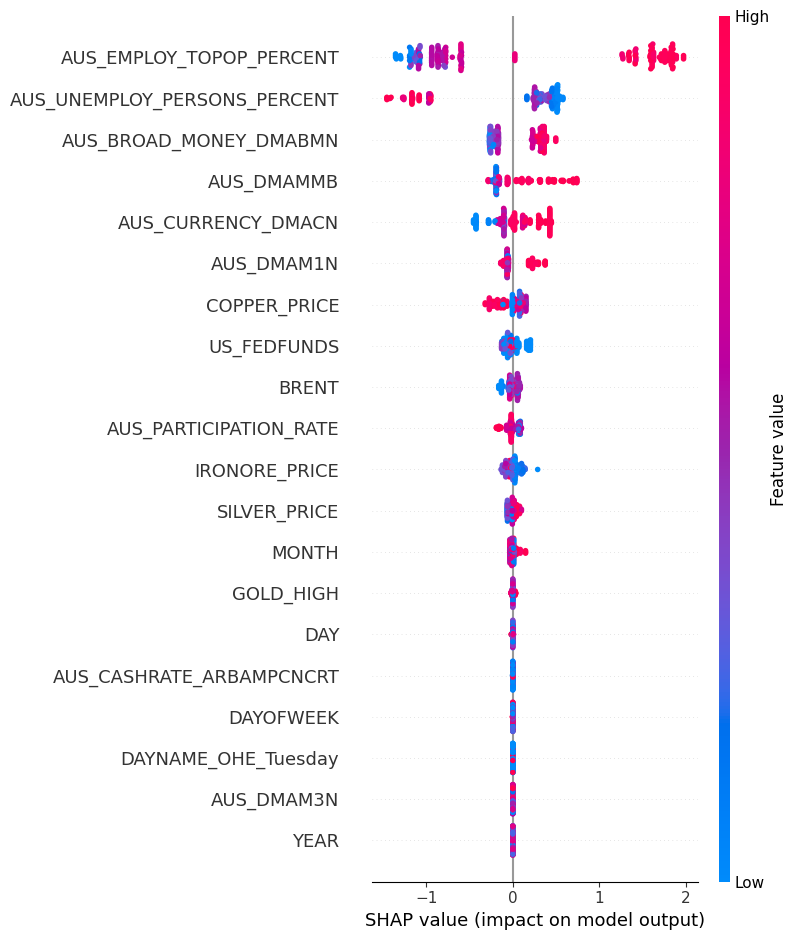

In [70]:
# plot the feature importance
shap.summary_plot(shap_values, x_test_onehot) #what SHAP considers important to predict sales price using lightgbm. This is the end part of ML as it shows correlation of sales price and featured values

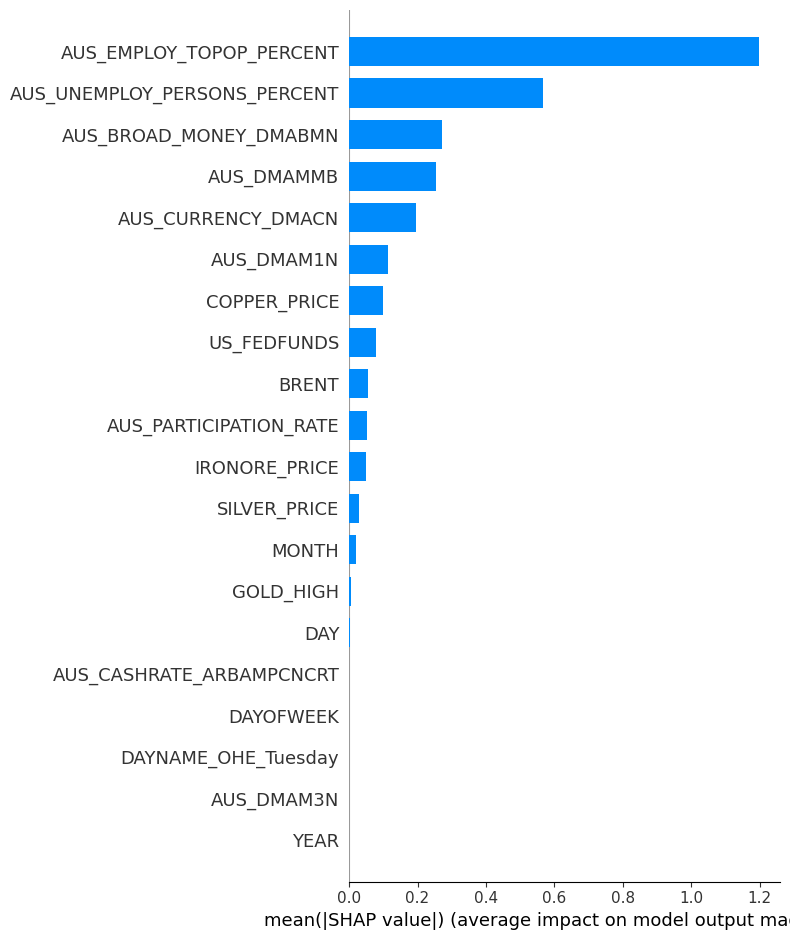

In [71]:
# plot the feature importance
shap.summary_plot(shap_values, x_test_onehot, plot_type="bar")

## From the summary plot the **most important features** sorted by their importance level. Australia's inflation rate is majorly driven by employment and Money supply.

## FORCE PLOT

In [72]:
shap.initjs()
shap.force_plot(shap_values)

In [74]:
shap.initjs()
shap.force_plot(shap_values[0]) #Explanatory ML

The Australian inflation rate is likely to increase when the rate of unemployment is high and a higher federal fund rate.
However its important to consider other deliverables i.e. broad money, this is the amount of money circulating an economy  and the market price of commodities especially Copper as this can lower the inflation rate

Based on the criteria above, to achieve a moderate inflation rate of 3.19% the  following conditions should be met:

Employment rate of at least 63.1%
Unemployment rate to be below 4.6%
Money supply base of at least 2,612 bn
Price of Copper of at least 9605


## Partial Dependancy Plot

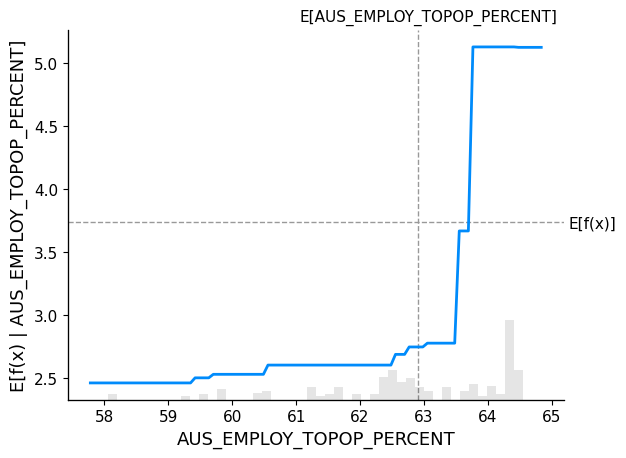

In [73]:
%matplotlib inline
shap.plots.partial_dependence(
    "AUS_EMPLOY_TOPOP_PERCENT",
    fitted_model.predict,
    pd.DataFrame(x_test_onehot, columns=x_test_onehot.columns),
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

The chart illustrates the following:

The employment rate positively influences the inflation rate whereby we can see a positive corr. between this two variable but remains stagnant from 63% - 65%

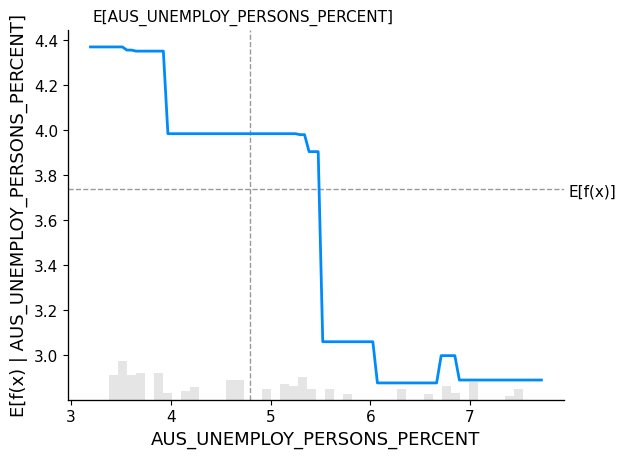

In [75]:
%matplotlib inline
shap.plots.partial_dependence(
    "AUS_UNEMPLOY_PERSONS_PERCENT",
    fitted_model.predict,
    pd.DataFrame(x_test_onehot, columns=x_test_onehot.columns),
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

A low unemployment rate = increasing inflation rate  

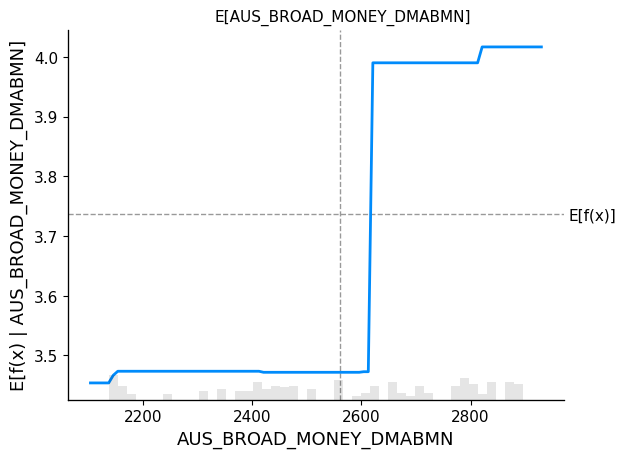

In [76]:
%matplotlib inline
shap.plots.partial_dependence(
    "AUS_BROAD_MONEY_DMABMN",
    fitted_model.predict,
    pd.DataFrame(x_test_onehot, columns=x_test_onehot.columns),
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

The chart displays a partial dependence plot showing the relationship between Australian broad money supply and the expected inflation rate. Initially, there is a flat and stable relationship, but beyond a certain threshold of broad money supply (around 2600), the plot exhibits a steep upward curve, indicating a significant rise in the expected inflation rate. This aligns with economic theory, suggesting excessive money supply growth can fuel inflationary pressures in an economy (Claude AI)

# Causal Machine Learning

In [77]:
# order feature names according to shap values
vals = np.abs(shap_values.values).mean(0)

# collect data for features importances
feature_importance = pd.DataFrame(
    list(zip(shap_values.feature_names, vals)), columns=["features", "importance"]
)


feature_importance.sort_values(by=["importance"], ascending=False, inplace=True)

# keep top k features for causal analysis
k = 20

sorted_features = feature_importance["features"]


top_k_features = list(sorted_features.values)[:k]

In [ ]:
top_k_features

['AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_DMAMMB',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'COPPER_PRICE',
 'US_FEDFUNDS',
 'BRENT',
 'AUS_PARTICIPATION_RATE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'MONTH',
 'GOLD_HIGH',
 'DAY',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'DAYOFWEEK',
 'AUS_DMAM3N',
 'AUS_GNI_TOT',
 'WTI']

In [78]:
# collect data for features importances
feature_importance = pd.DataFrame(
    list(zip(shap_values.feature_names, vals)), columns=["features", "importance"]
) #creating a two column data with features and importance
feature_importance

features  importance
0                      GOLD_HIGH    0.004230
1                          BRENT    0.053979
2                   COPPER_PRICE    0.099487
3                  IRONORE_PRICE    0.049275
4                   SILVER_PRICE    0.028459
5                    US_FEDFUNDS    0.077143
6                            WTI    0.000000
7                    AUS_GNI_TOT    0.000000
8         AUS_BROAD_MONEY_DMABMN    0.272039
9       AUS_CASHRATE_ARBAMPCNCRT    0.000586
10            AUS_CURRENCY_DMACN    0.194729
11                    AUS_DMAM1N    0.114308
12                    AUS_DMAM3N    0.000000
13                    AUS_DMAMMB    0.253532
14      AUS_EMPLOY_TOPOP_PERCENT    1.198955
15        AUS_PARTICIPATION_RATE    0.052242
16  AUS_UNEMPLOY_PERSONS_PERCENT    0.565505
17                           DAY    0.001687
18                         MONTH    0.020287
19                          YEAR    0.000000
20                     DAYOFWEEK    0.000155
21                     Intercept    0.000000
22            DAYNAME_OHE_Friday    0.000000
23            DAYNAME_OHE_Monday    0.000000
24          DAYNAME_OHE_Saturday    0.000000
25            DAYNAME_OHE_Sunday    0.000000
26          DAYNAME_OHE_Thursday    0.000000
27           DAYNAME_OHE_Tuesday    0.000000
28         DAYNAME_OHE_Wednesday    0.000000

In [79]:
from econml.solutions.causal_analysis import CausalAnalysis

# initialize heterogeneity features
heterogeneous_cols = ['GOLD_HIGH', 'BRENT', 'WTI', 'US_FEDFUNDS'] #heterogeneous features

In [80]:
onehot_X.columns.to_list()

['GOLD_HIGH',
 'BRENT',
 'COPPER_PRICE',
 'IRONORE_PRICE',
 'SILVER_PRICE',
 'US_FEDFUNDS',
 'WTI',
 'AUS_GNI_TOT',
 'AUS_BROAD_MONEY_DMABMN',
 'AUS_CASHRATE_ARBAMPCNCRT',
 'AUS_CURRENCY_DMACN',
 'AUS_DMAM1N',
 'AUS_DMAM3N',
 'AUS_DMAMMB',
 'AUS_EMPLOY_TOPOP_PERCENT',
 'AUS_PARTICIPATION_RATE',
 'AUS_UNEMPLOY_PERSONS_PERCENT',
 'DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'Intercept',
 'DAYNAME_OHE_Friday',
 'DAYNAME_OHE_Monday',
 'DAYNAME_OHE_Saturday',
 'DAYNAME_OHE_Sunday',
 'DAYNAME_OHE_Thursday',
 'DAYNAME_OHE_Tuesday',
 'DAYNAME_OHE_Wednesday']

In [81]:
categorical_data = ['DAY',
 'MONTH',
 'YEAR',
 'DAYOFWEEK',
 'DAYNAME_OHE_Friday',
 'DAYNAME_OHE_Monday',
 'DAYNAME_OHE_Saturday',
 'DAYNAME_OHE_Sunday',
 'DAYNAME_OHE_Thursday',
 'DAYNAME_OHE_Tuesday',
 'DAYNAME_OHE_Wednesday']

In [82]:
len(categorical_data)

11

In [83]:
# create the causal machine learning model
causal_analysis = CausalAnalysis(

    #top k features
    feature_inds=top_k_features,

    # categorical data
    categorical= categorical_data,

    classification=False,
    nuisance_models="automl",
    heterogeneity_model="linear",
    n_jobs=-1,
    random_state=123,
    upper_bound_on_cat_expansion=41
)

### Run Causal Machine Learning

In [84]:
# run casual machine learning on training data
causal_analysis.fit(x_train_onehot, y_train)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+00, tolerance: 3.592e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+00, tolerance: 3.507e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.806e+00, tolerance: 3.454e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.635e+00, tolerance: 5.282e-01


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 45
[LightGBM] [Info] Start training from score 3.571558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

##Predictions

### Predictive Population Effects of Treatments and Policies

#### The Global Population Effect - Average Treatment Effect (ATE)

In [85]:
# get global causal effect ordered by causal importance (pvalue)
global_population_effects = causal_analysis.global_causal_effect(alpha=0.05)

# sort by p-values: significant if pvalue < 0.05
global_population_effects.sort_values(by="p_value")

point        stderr         zstat  \
feature                feature_value                                         
DAY                    9v1           -0.099347  1.824465e-10 -5.445291e+08   
                       3v1            0.175914  3.130702e-10  5.619002e+08   
                       4v1            0.367468  7.817497e-11  4.700585e+09   
                       5v1           -0.192014  1.266571e-10 -1.516016e+09   
                       6v1            0.053081  2.998414e-11  1.770301e+09   
...                                        ...           ...           ...   
COPPER_PRICE           num            0.000190  3.558901e-04  5.329574e-01   
AUS_PARTICIPATION_RATE num           -0.222843  4.525148e-01 -4.924555e-01   
AUS_BROAD_MONEY_DMABMN num           -0.000885  2.212879e-03 -3.997369e-01   
AUS_DMAM1N             num            0.002433  7.069190e-03  3.442225e-01   
GOLD_HIGH              num           -0.000023  1.119108e-04 -2.075951e-01   

                                       p_value  ci_lower  ci_upper  
feature                feature_value                                
DAY                    9v1            0.000000 -0.099347 -0.099347  
                       3v1            0.000000  0.175914  0.175914  
                       4v1            0.000000  0.367468  0.367468  
                       5v1            0.000000 -0.192014 -0.192014  
                       6v1            0.000000  0.053081  0.053081  
...                                        ...       ...       ...  
COPPER_PRICE           num            0.594063 -0.000508  0.000887  
AUS_PARTICIPATION_RATE num            0.622397 -1.109756  0.664069  
AUS_BROAD_MONEY_DMABMN num            0.689350 -0.005222  0.003453  
AUS_DMAM1N             num            0.730679 -0.011422  0.016289  
GOLD_HIGH              num            0.835545 -0.000243  0.000196  

[64 rows x 6 columns]

In [86]:
global_population_effects['FEATURE'] = global_population_effects.index

In [87]:
global_population_effects

point      stderr  \
feature                      feature_value                             
AUS_EMPLOY_TOPOP_PERCENT     num               -0.454622    0.806504   
AUS_UNEMPLOY_PERSONS_PERCENT num               -0.943296    0.682367   
AUS_BROAD_MONEY_DMABMN       num               -0.000885    0.002213   
AUS_DMAMMB                   num                0.012514    0.004118   
AUS_CURRENCY_DMACN           num                0.051897    0.085740   
...                                                  ...         ...   
DAYOFWEEK                    5v0            -1003.666068  847.591028   
                             6v0            57517.861709  845.830874   
AUS_DMAM3N                   num                0.007414    0.006709   
AUS_GNI_TOT                  num               -0.000007    0.000006   
WTI                          num                0.505410    0.092943   

                                                zstat       p_value  \
feature                      feature_value                            
AUS_EMPLOY_TOPOP_PERCENT     num            -0.563694  5.729622e-01   
AUS_UNEMPLOY_PERSONS_PERCENT num            -1.382388  1.668525e-01   
AUS_BROAD_MONEY_DMABMN       num            -0.399737  6.893503e-01   
AUS_DMAMMB                   num             3.038443  2.378041e-03   
AUS_CURRENCY_DMACN           num             0.605283  5.449907e-01   
...                                               ...           ...   
DAYOFWEEK                    5v0            -1.184140  2.363578e-01   
                             6v0            68.001611  0.000000e+00   
AUS_DMAM3N                   num             1.105209  2.690689e-01   
AUS_GNI_TOT                  num            -1.242569  2.140266e-01   
WTI                          num             5.437837  5.393124e-08   

                                                ci_lower      ci_upper  \
feature                      feature_value                               
AUS_EMPLOY_TOPOP_PERCENT     num               -2.035342      1.126098   
AUS_UNEMPLOY_PERSONS_PERCENT num               -2.280710      0.394118   
AUS_BROAD_MONEY_DMABMN       num               -0.005222      0.003453   
AUS_DMAMMB                   num                0.004442      0.020586   
AUS_CURRENCY_DMACN           num               -0.116150      0.219944   
...                                                  ...           ...   
DAYOFWEEK                    5v0            -2664.913957    657.581820   
                             6v0            55860.063659  59175.659760   
AUS_DMAM3N                   num               -0.005734      0.020563   
AUS_GNI_TOT                  num               -0.000018      0.000004   
WTI                          num                0.323245      0.687576   

                                                                        FEATURE  
feature                      feature_value                                       
AUS_EMPLOY_TOPOP_PERCENT     num                (AUS_EMPLOY_TOPOP_PERCENT, num)  
AUS_UNEMPLOY_PERSONS_PERCENT num            (AUS_UNEMPLOY_PERSONS_PERCENT, num)  
AUS_BROAD_MONEY_DMABMN       num                  (AUS_BROAD_MONEY_DMABMN, num)  
AUS_DMAMMB                   num                              (AUS_DMAMMB, num)  
AUS_CURRENCY_DMACN           num                      (AUS_CURRENCY_DMACN, num)  
...                                                                         ...  
DAYOFWEEK                    5v0                               (DAYOFWEEK, 5v0)  
                             6v0                               (DAYOFWEEK, 6v0)  
AUS_DMAM3N                   num                              (AUS_DMAM3N, num)  
AUS_GNI_TOT                  num                             (AUS_GNI_TOT, num)  
WTI                          num                                     (WTI, num)  

[64 rows x 7 columns]

The chart shows that global oil prices, represented by WTI and Brent crude benchmarks, have a strong impact on inflation in Australia. The price of silver, often seen as a hedge against inflation, also has a significant influence. Changes in Australia's monetary supply, also important in determining inflation. These four factors are the most statistically significant drivers of inflation in Australia.

In [88]:
global_population_effects.to_csv('dgea_global_population_effects.csv', index=False)

In [89]:
# helper function to plot error bar
def errorbar(res):
    xticks = res.index.get_level_values(0)
    lowererr = res["point"] - res["ci_lower"]
    uppererr = res["ci_upper"] - res["point"]
    xticks = [
        "{}***".format(t)
        if p < 1e-6
        else ("{}**".format(t) if p < 1e-3 else ("{}*".format(t) if p < 1e-2 else t))
        for t, p in zip(xticks, res["p_value"])
    ]
    plot_title = "Direct Causal Effect of Each Feature with 95% Confidence Interval, "
    plt.figure(figsize=(40, 20))
    plt.errorbar(
        np.arange(len(xticks)),
        res["point"],
        yerr=[lowererr, uppererr],
        fmt="o",
        capsize=5,
        capthick=1,
        barsabove=True,
    )
    plt.xticks(np.arange(len(xticks)), xticks, rotation=45)
    plt.title(plot_title)
    plt.axhline(0, color="r", linestyle="--", alpha=0.5)
    plt.ylabel("Average Treatment Effect")

## the ATE Chart

Casual factors are above the 0 (red) line, these are factors that will Increase the Inflation rate

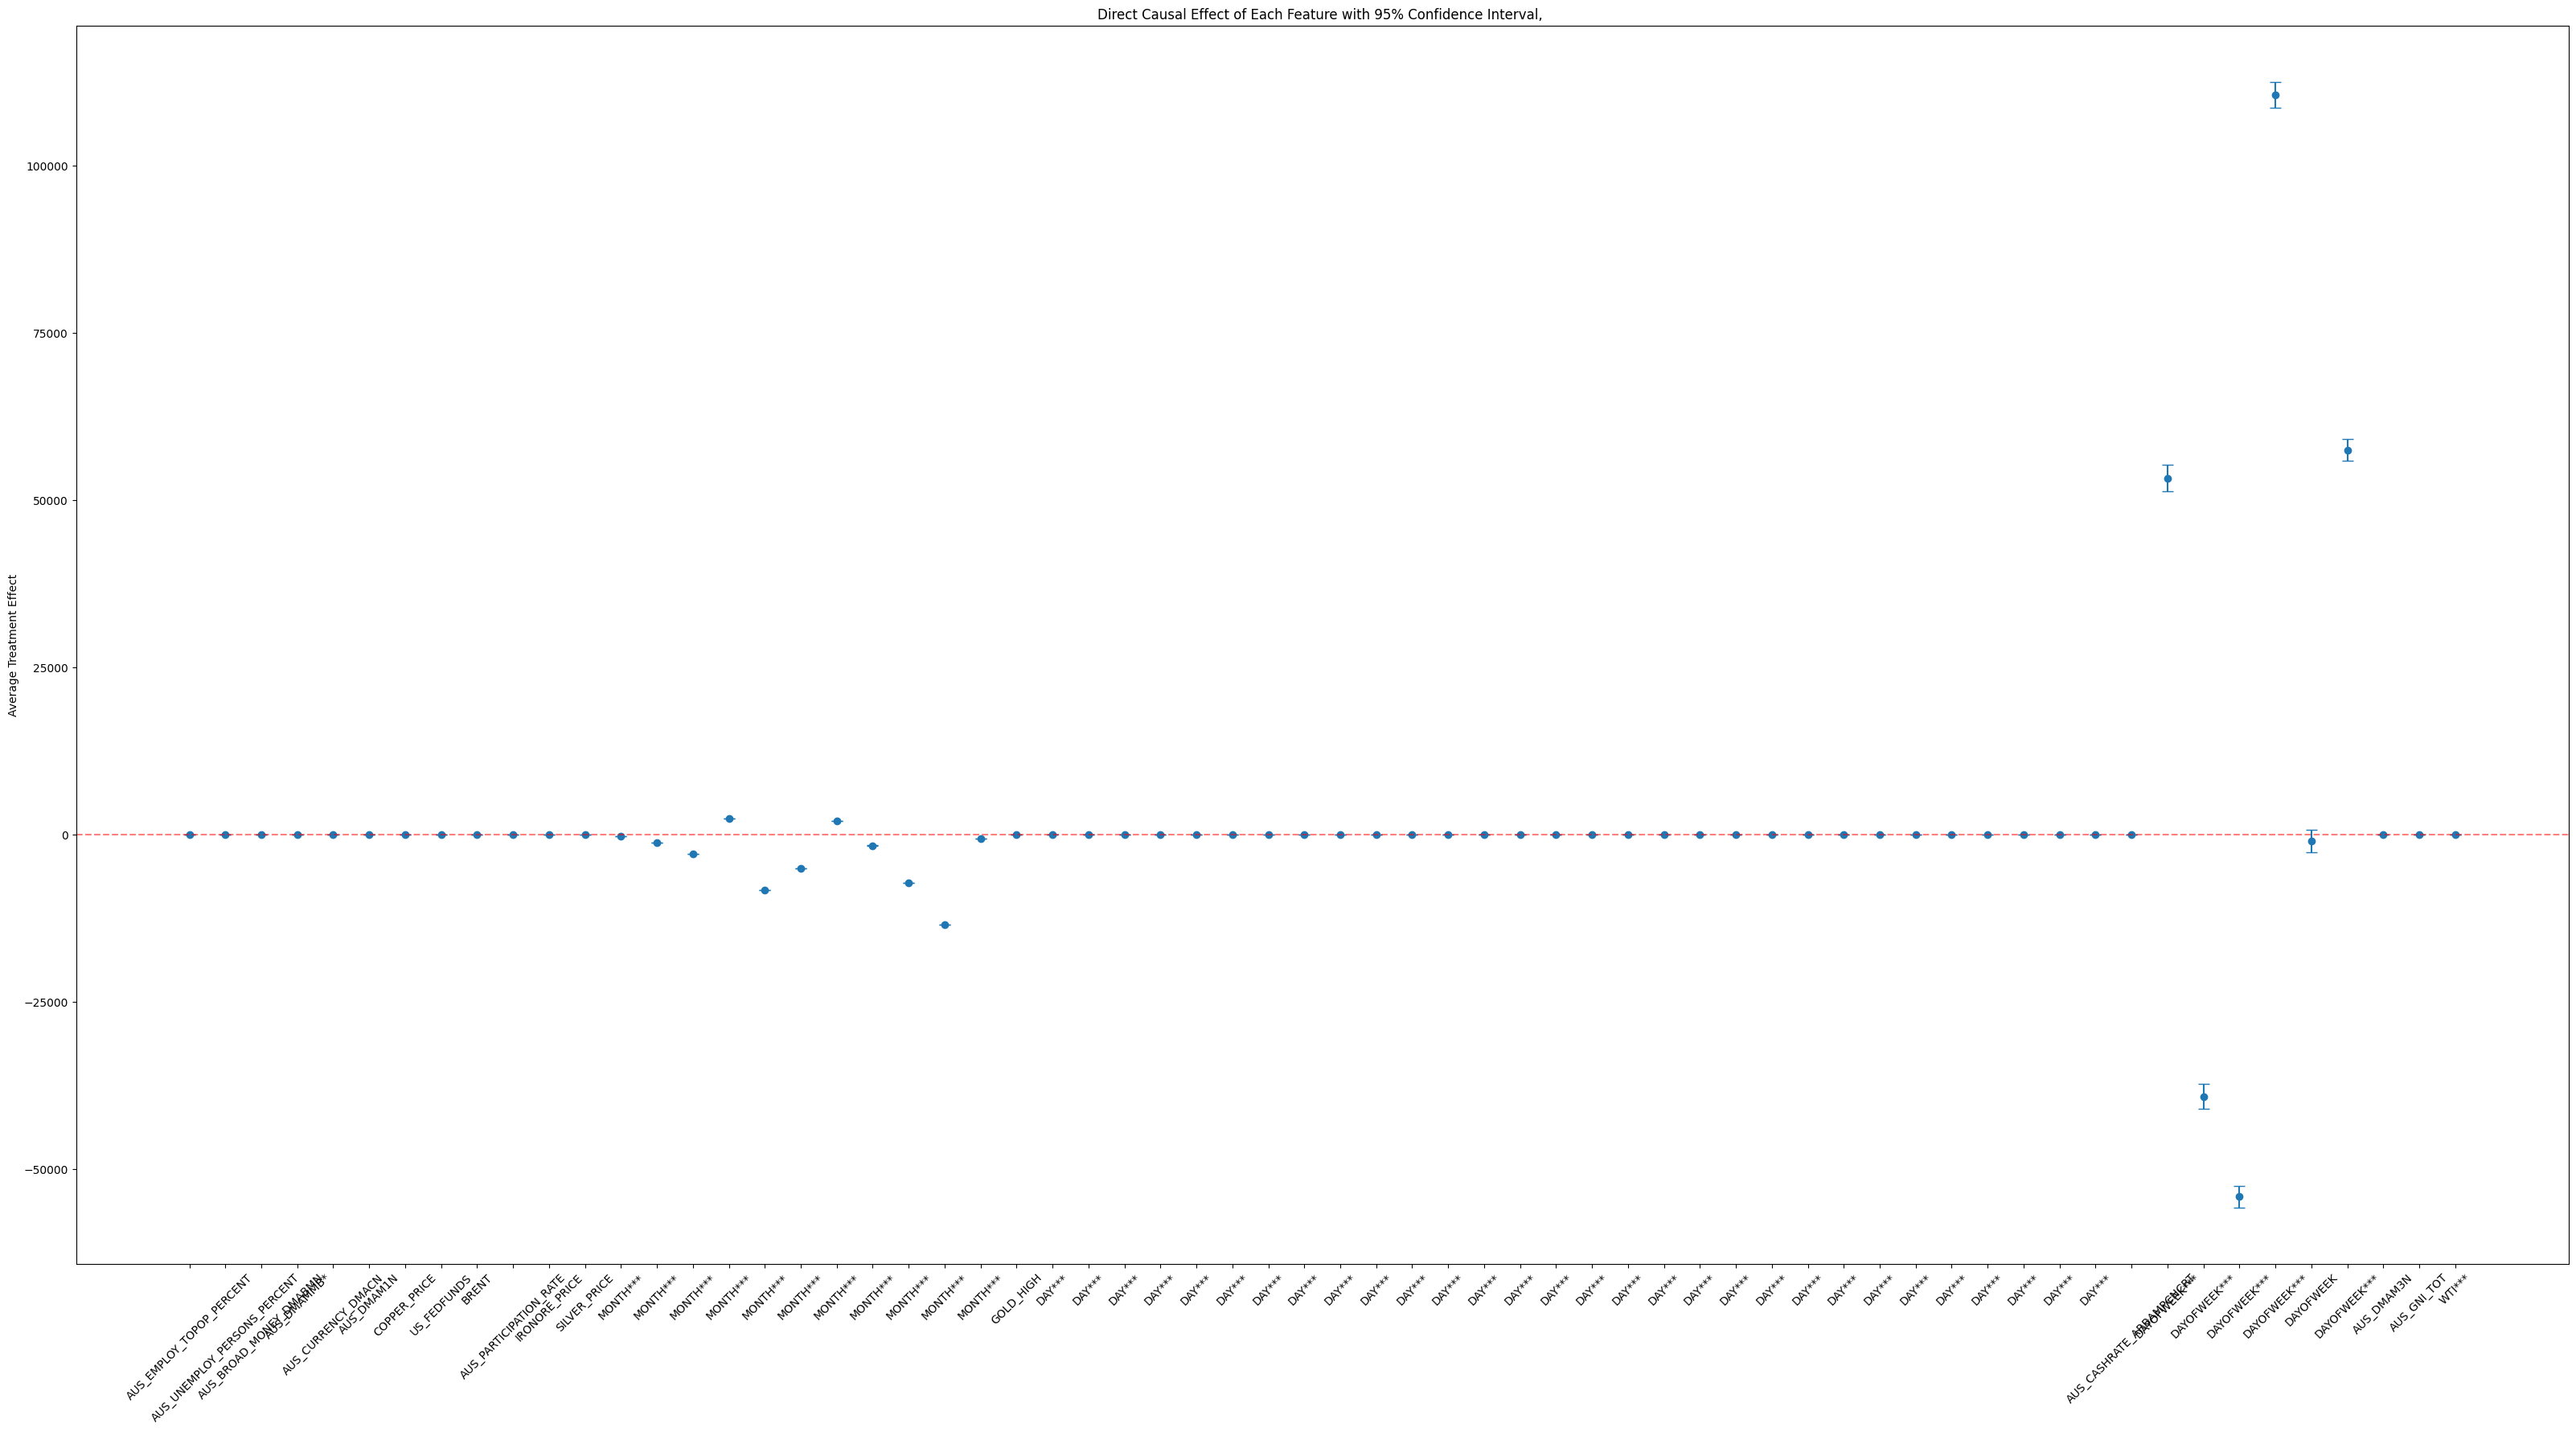

In [90]:
%matplotlib inline
errorbar(global_population_effects)

In [91]:
# initialize heterogeneity features
from econml.solutions.causal_analysis import CausalAnalysis

# initialize heterogeneity features
heterogeneous_cols = ['GOLD_HIGH', 'BRENT', 'WTI', 'US_FEDFUNDS']

In [92]:
# create the causal machine learning model
causal_analysis_hetero = CausalAnalysis(

    #top k features
    feature_inds=top_k_features,

    heterogeneity_inds=['GOLD_HIGH', 'BRENT', 'WTI', 'US_FEDFUNDS'],

    # categorical data
    categorical= categorical_data,

    classification=False,
    nuisance_models="automl",
    heterogeneity_model="linear",
    n_jobs=-1,
    random_state=123,
    upper_bound_on_cat_expansion=41
)

In [93]:
# run casual machine learning on training data
causal_analysis_hetero.fit(x_train_onehot, y_train)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+00, tolerance: 3.592e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+00, tolerance: 3.507e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.806e+00, tolerance: 3.454e-01
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.635e+00, tolerance: 5.282e-01


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 45
[LightGBM] [Info] Start training from score 3.571558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [95]:
# get global causal effect ordered by causal importance (pvalue)
global_population_effects_hetero = causal_analysis_hetero.global_causal_effect(alpha=0.05)


global_population_effects_hetero.sort_values(by="p_value")

point      stderr     zstat  \
feature                feature_value                                      
MONTH                  8v1            -420.823591  131.271756 -3.205744   
                       4v1           -1539.780426  549.238935 -2.803480   
IRONORE_PRICE          num               0.007684    0.002840  2.705359   
MONTH                  12v1          -1088.410992  415.717866 -2.618148   
                       3v1            -484.479106  208.921105 -2.318957   
...                                           ...         ...       ...   
AUS_BROAD_MONEY_DMABMN num              -0.000122    0.001794 -0.068059   
DAY                    18v1              0.000235    0.004203  0.055887   
                       28v1              0.000131    0.018610  0.007032   
                       26v1              0.000028    0.004172  0.006640   
                       15v1              0.000007    0.003915  0.001675   

                                       p_value     ci_lower    ci_upper  
feature                feature_value                                     
MONTH                  8v1            0.001347  -678.111505 -163.535676  
                       4v1            0.005055 -2616.268957 -463.291895  
IRONORE_PRICE          num            0.006823     0.002117    0.013250  
MONTH                  12v1           0.008841 -1903.203037 -273.618946  
                       3v1            0.020397  -893.956947  -75.001265  
...                                        ...          ...         ...  
AUS_BROAD_MONEY_DMABMN num            0.945739    -0.003639    0.003394  
DAY                    18v1           0.955432    -0.008003    0.008473  
                       28v1           0.994389    -0.036345    0.036607  
                       26v1           0.994702    -0.008149    0.008205  
                       15v1           0.998663    -0.007667    0.007680  

[64 rows x 6 columns]

In [97]:
global_population_effects_hetero.to_csv('dgea_global_population_effects_hetero.csv', index=False)

In [100]:
global_population_effects_hetero.to_excel('dgea_global_population_effects_hetero.xlsx')

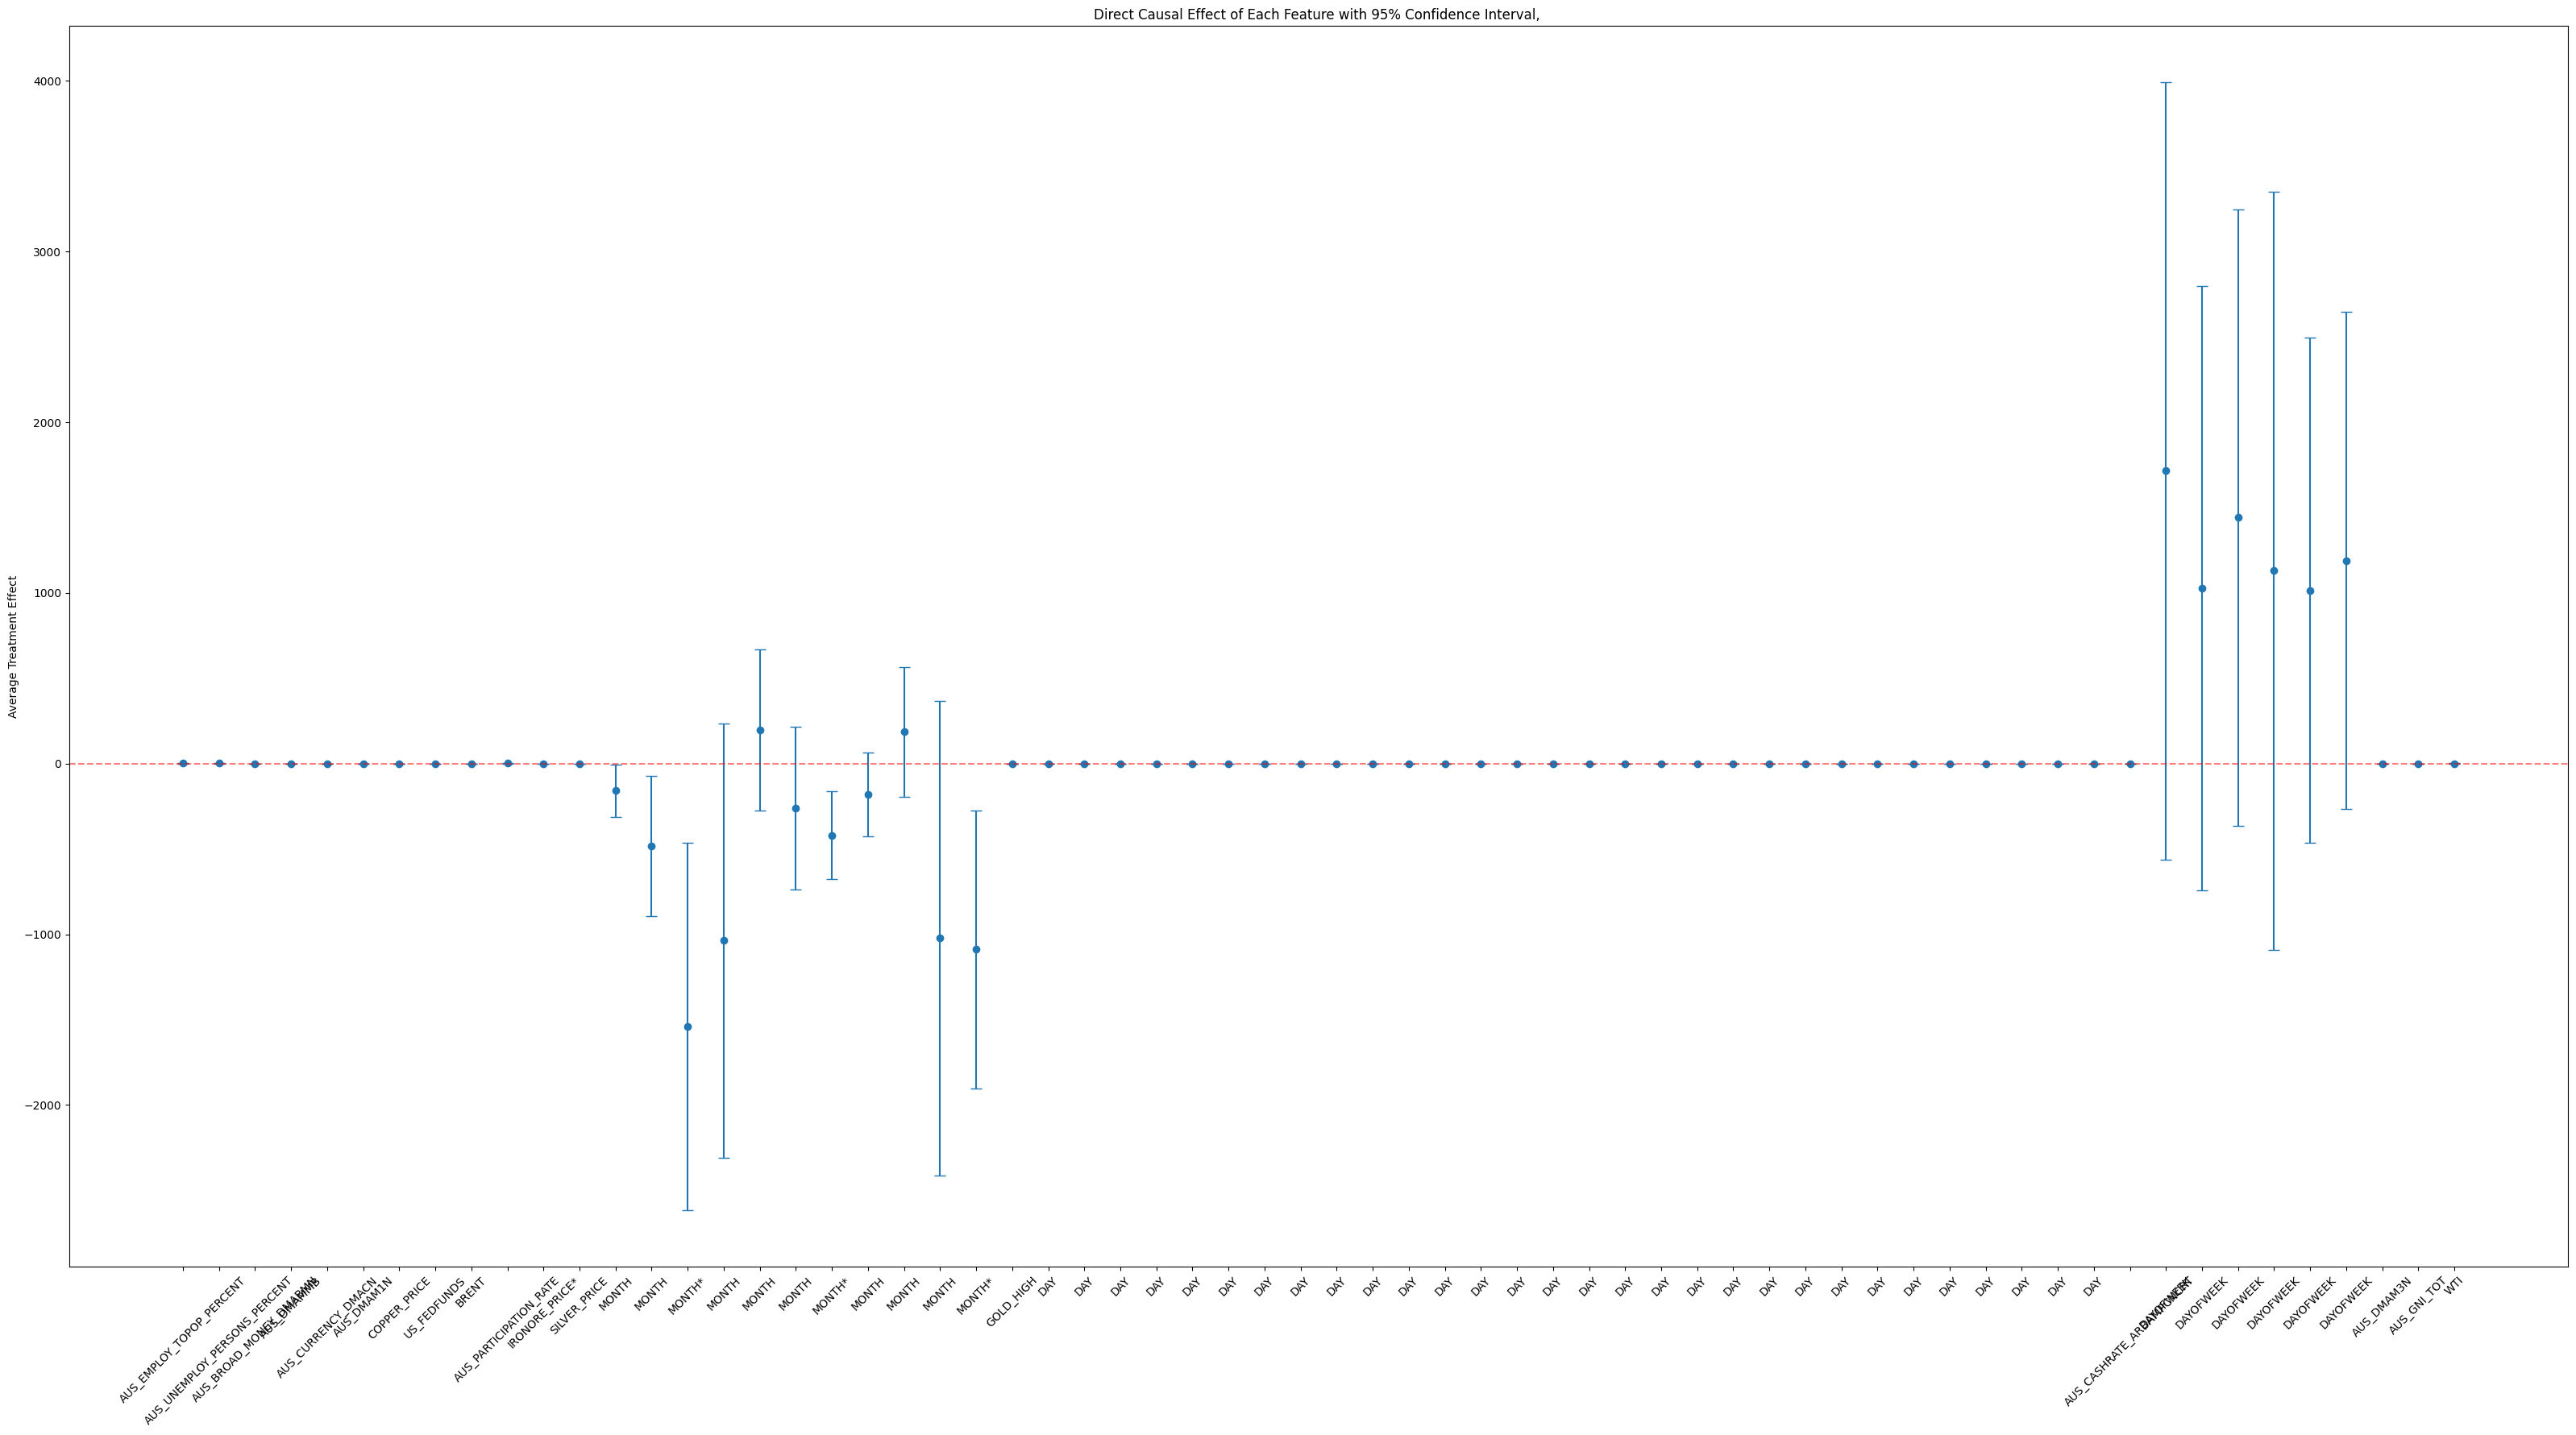

In [108]:
errorbar(global_population_effects_hetero)

In [115]:
filtered_df = global_population_effects_hetero.drop(['MONTH', 'DAYOFWEEK', 'DAY'])
filtered_df

dropping on a non-lexsorted multi-index without a level parameter may impact performance.


point    stderr     zstat  \
feature                      feature_value                                     
AUS_EMPLOY_TOPOP_PERCENT     num            1.001015e+00  1.285546  0.778669   
AUS_UNEMPLOY_PERSONS_PERCENT num            5.915227e-01  0.800338  0.739091   
AUS_BROAD_MONEY_DMABMN       num           -1.221062e-04  0.001794 -0.068059   
AUS_DMAMMB                   num           -2.158676e-03  0.002553 -0.845480   
AUS_CURRENCY_DMACN           num            4.968803e-02  0.108458  0.458132   
AUS_DMAM1N                   num           -2.700398e-03  0.004337 -0.622674   
COPPER_PRICE                 num           -1.433779e-04  0.000435 -0.329507   
US_FEDFUNDS                  num           -2.464428e-01  0.277846 -0.886976   
BRENT                        num            1.035606e-01  0.085332  1.213619   
AUS_PARTICIPATION_RATE       num            6.901934e-01  0.389297  1.772923   
IRONORE_PRICE                num            7.683734e-03  0.002840  2.705359   
SILVER_PRICE                 num            1.081899e-01  0.071076  1.522180   
GOLD_HIGH                    num           -3.959668e-05  0.000077 -0.515496   
AUS_CASHRATE_ARBAMPCNCRT     num           -5.497392e-03  0.026973 -0.203811   
AUS_DMAM3N                   num            2.838670e-03  0.002924  0.970886   
AUS_GNI_TOT                  num            5.601563e-07  0.000002  0.302411   
WTI                          num            1.211017e-01  0.166249  0.728437   

                                             p_value  ci_lower  ci_upper  
feature                      feature_value                                
AUS_EMPLOY_TOPOP_PERCENT     num            0.436175 -1.518609  3.520639  
AUS_UNEMPLOY_PERSONS_PERCENT num            0.459852 -0.977112  2.160157  
AUS_BROAD_MONEY_DMABMN       num            0.945739 -0.003639  0.003394  
AUS_DMAMMB                   num            0.397843 -0.007163  0.002845  
AUS_CURRENCY_DMACN           num            0.646858 -0.162886  0.262262  
AUS_DMAM1N                   num            0.533499 -0.011200  0.005800  
COPPER_PRICE                 num            0.741772 -0.000996  0.000709  
US_FEDFUNDS                  num            0.375092 -0.791011  0.298126  
BRENT                        num            0.224893 -0.063687  0.270808  
AUS_PARTICIPATION_RATE       num            0.076241 -0.072814  1.453201  
IRONORE_PRICE                num            0.006823  0.002117  0.013250  
SILVER_PRICE                 num            0.127964 -0.031116  0.247496  
GOLD_HIGH                    num            0.606206 -0.000190  0.000111  
AUS_CASHRATE_ARBAMPCNCRT     num            0.838501 -0.058363  0.047369  
AUS_DMAM3N                   num            0.331605 -0.002892  0.008569  
AUS_GNI_TOT                  num            0.762339 -0.000003  0.000004  
WTI                          num            0.466346 -0.204740  0.446943

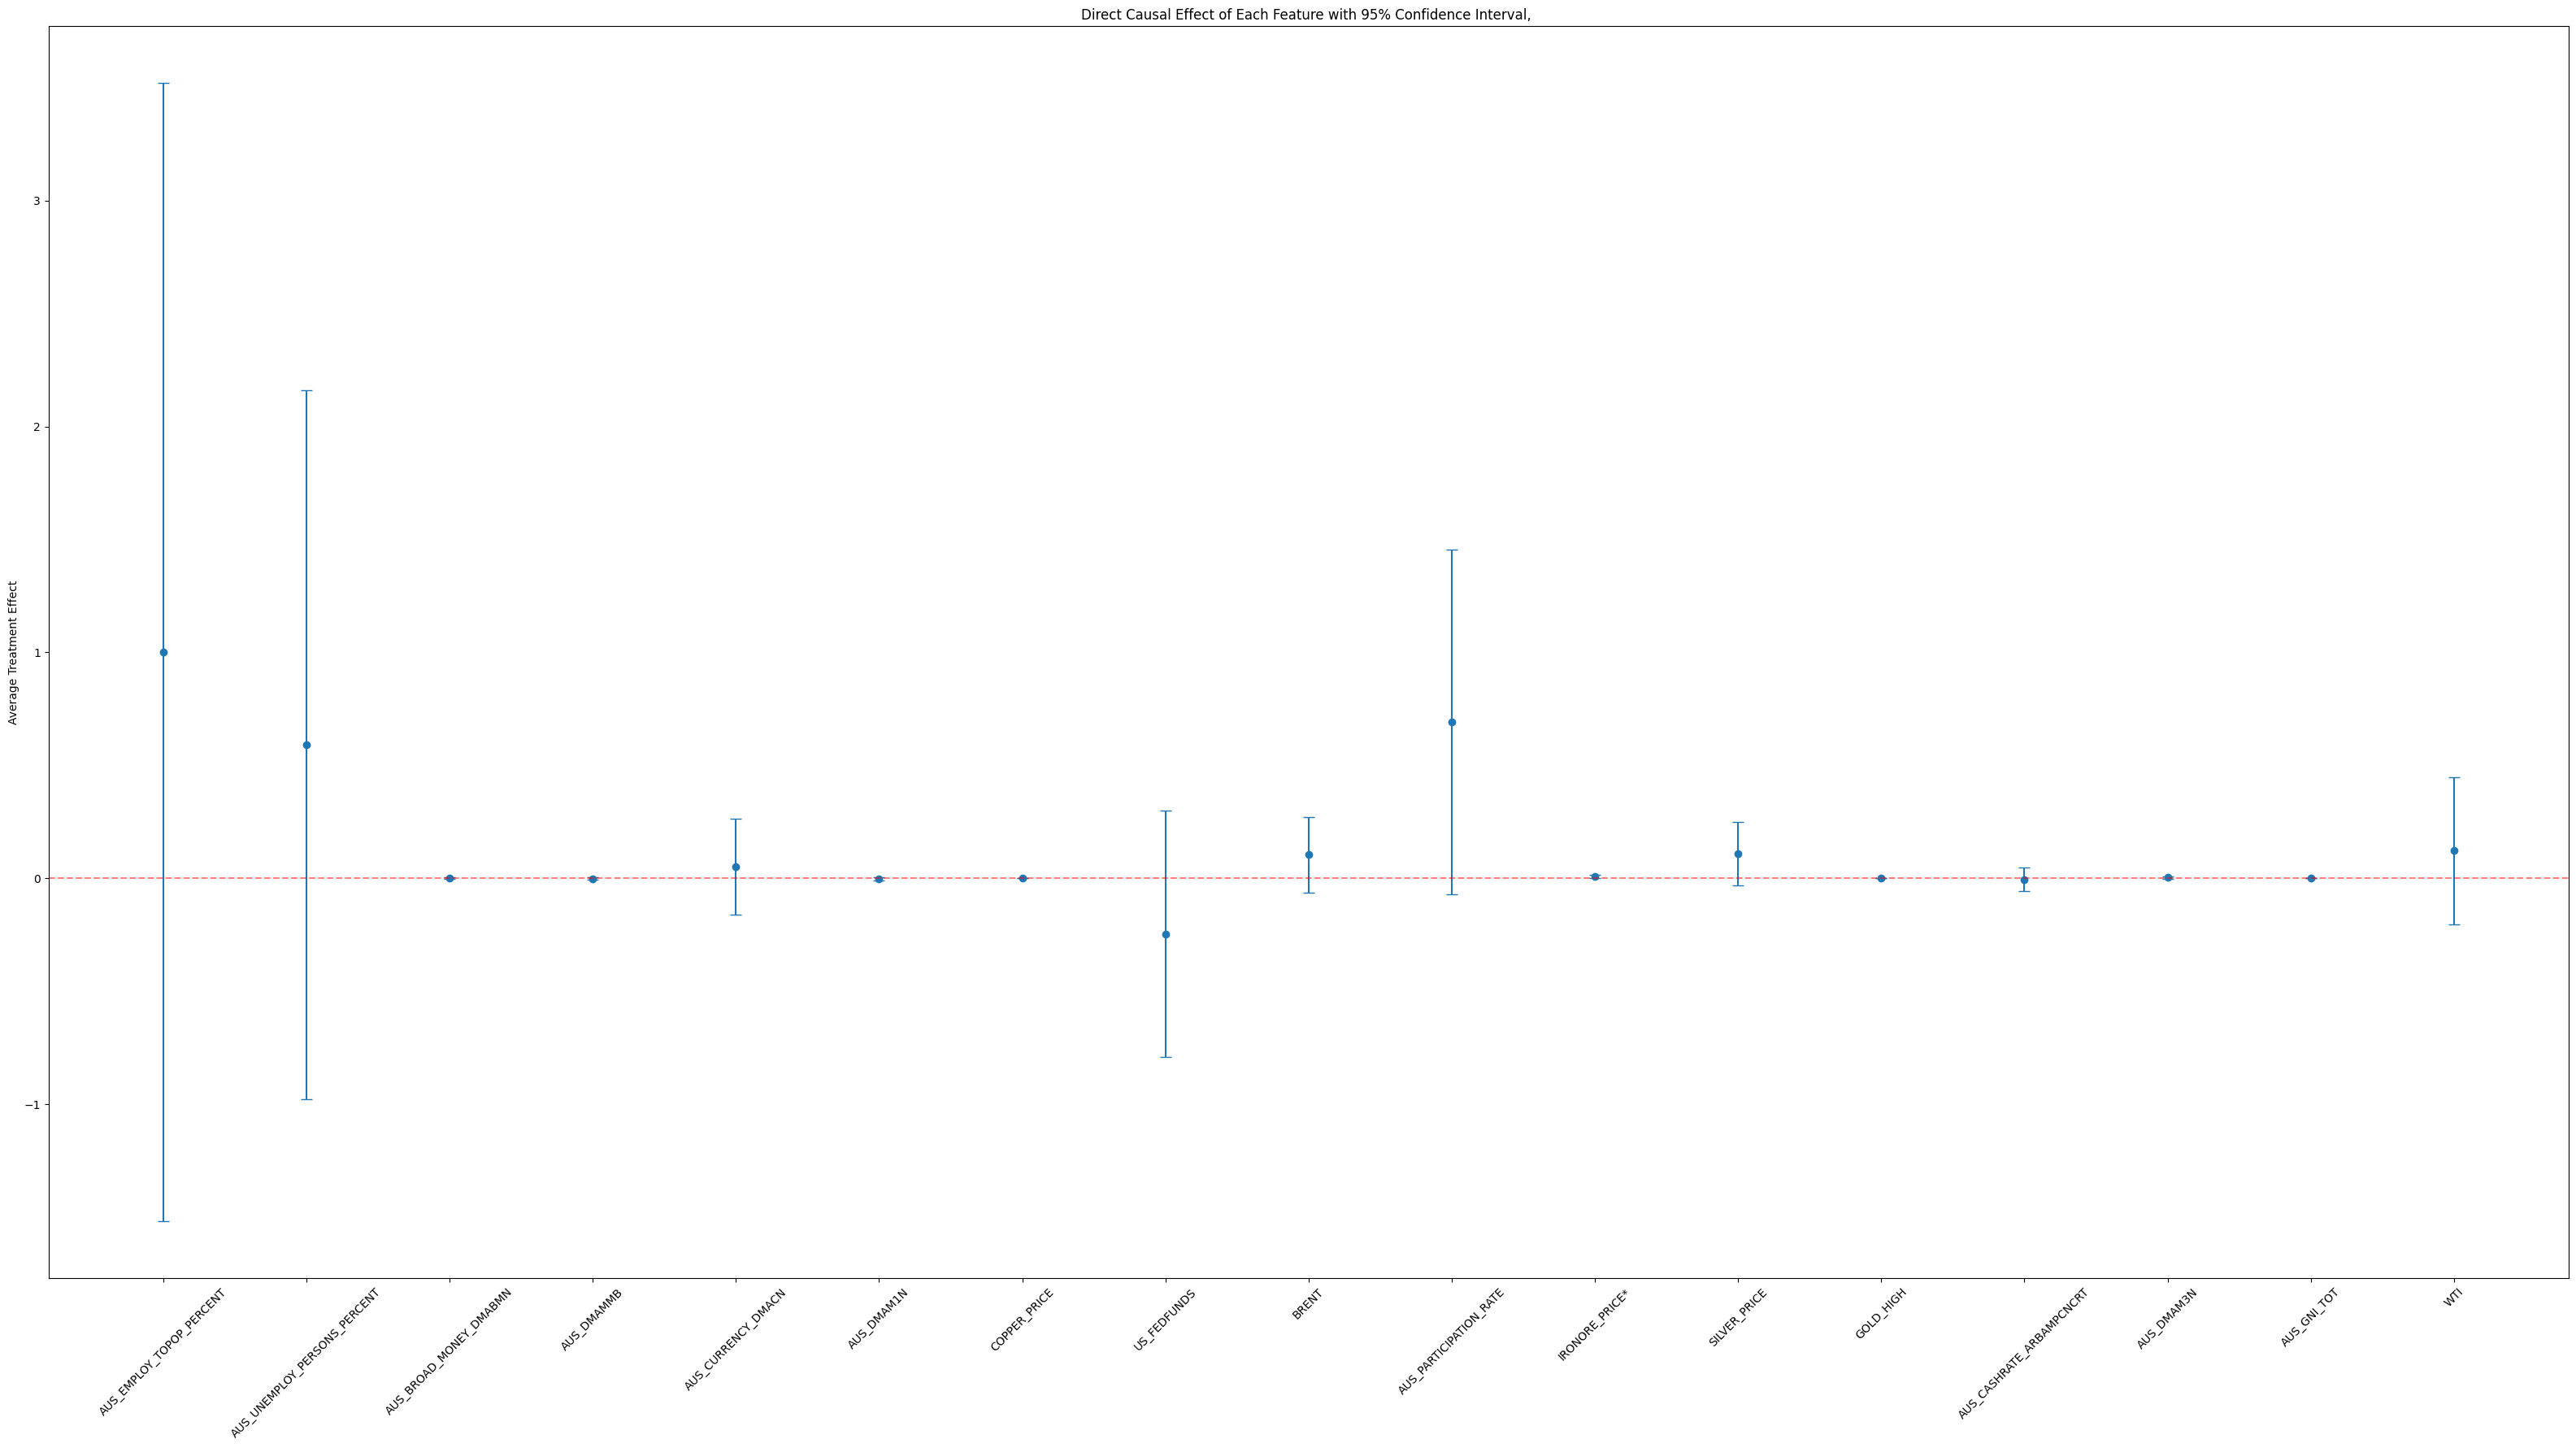

In [119]:
errorbar(filtered_df)

## What are the causal factors

# What if ANALYSIS

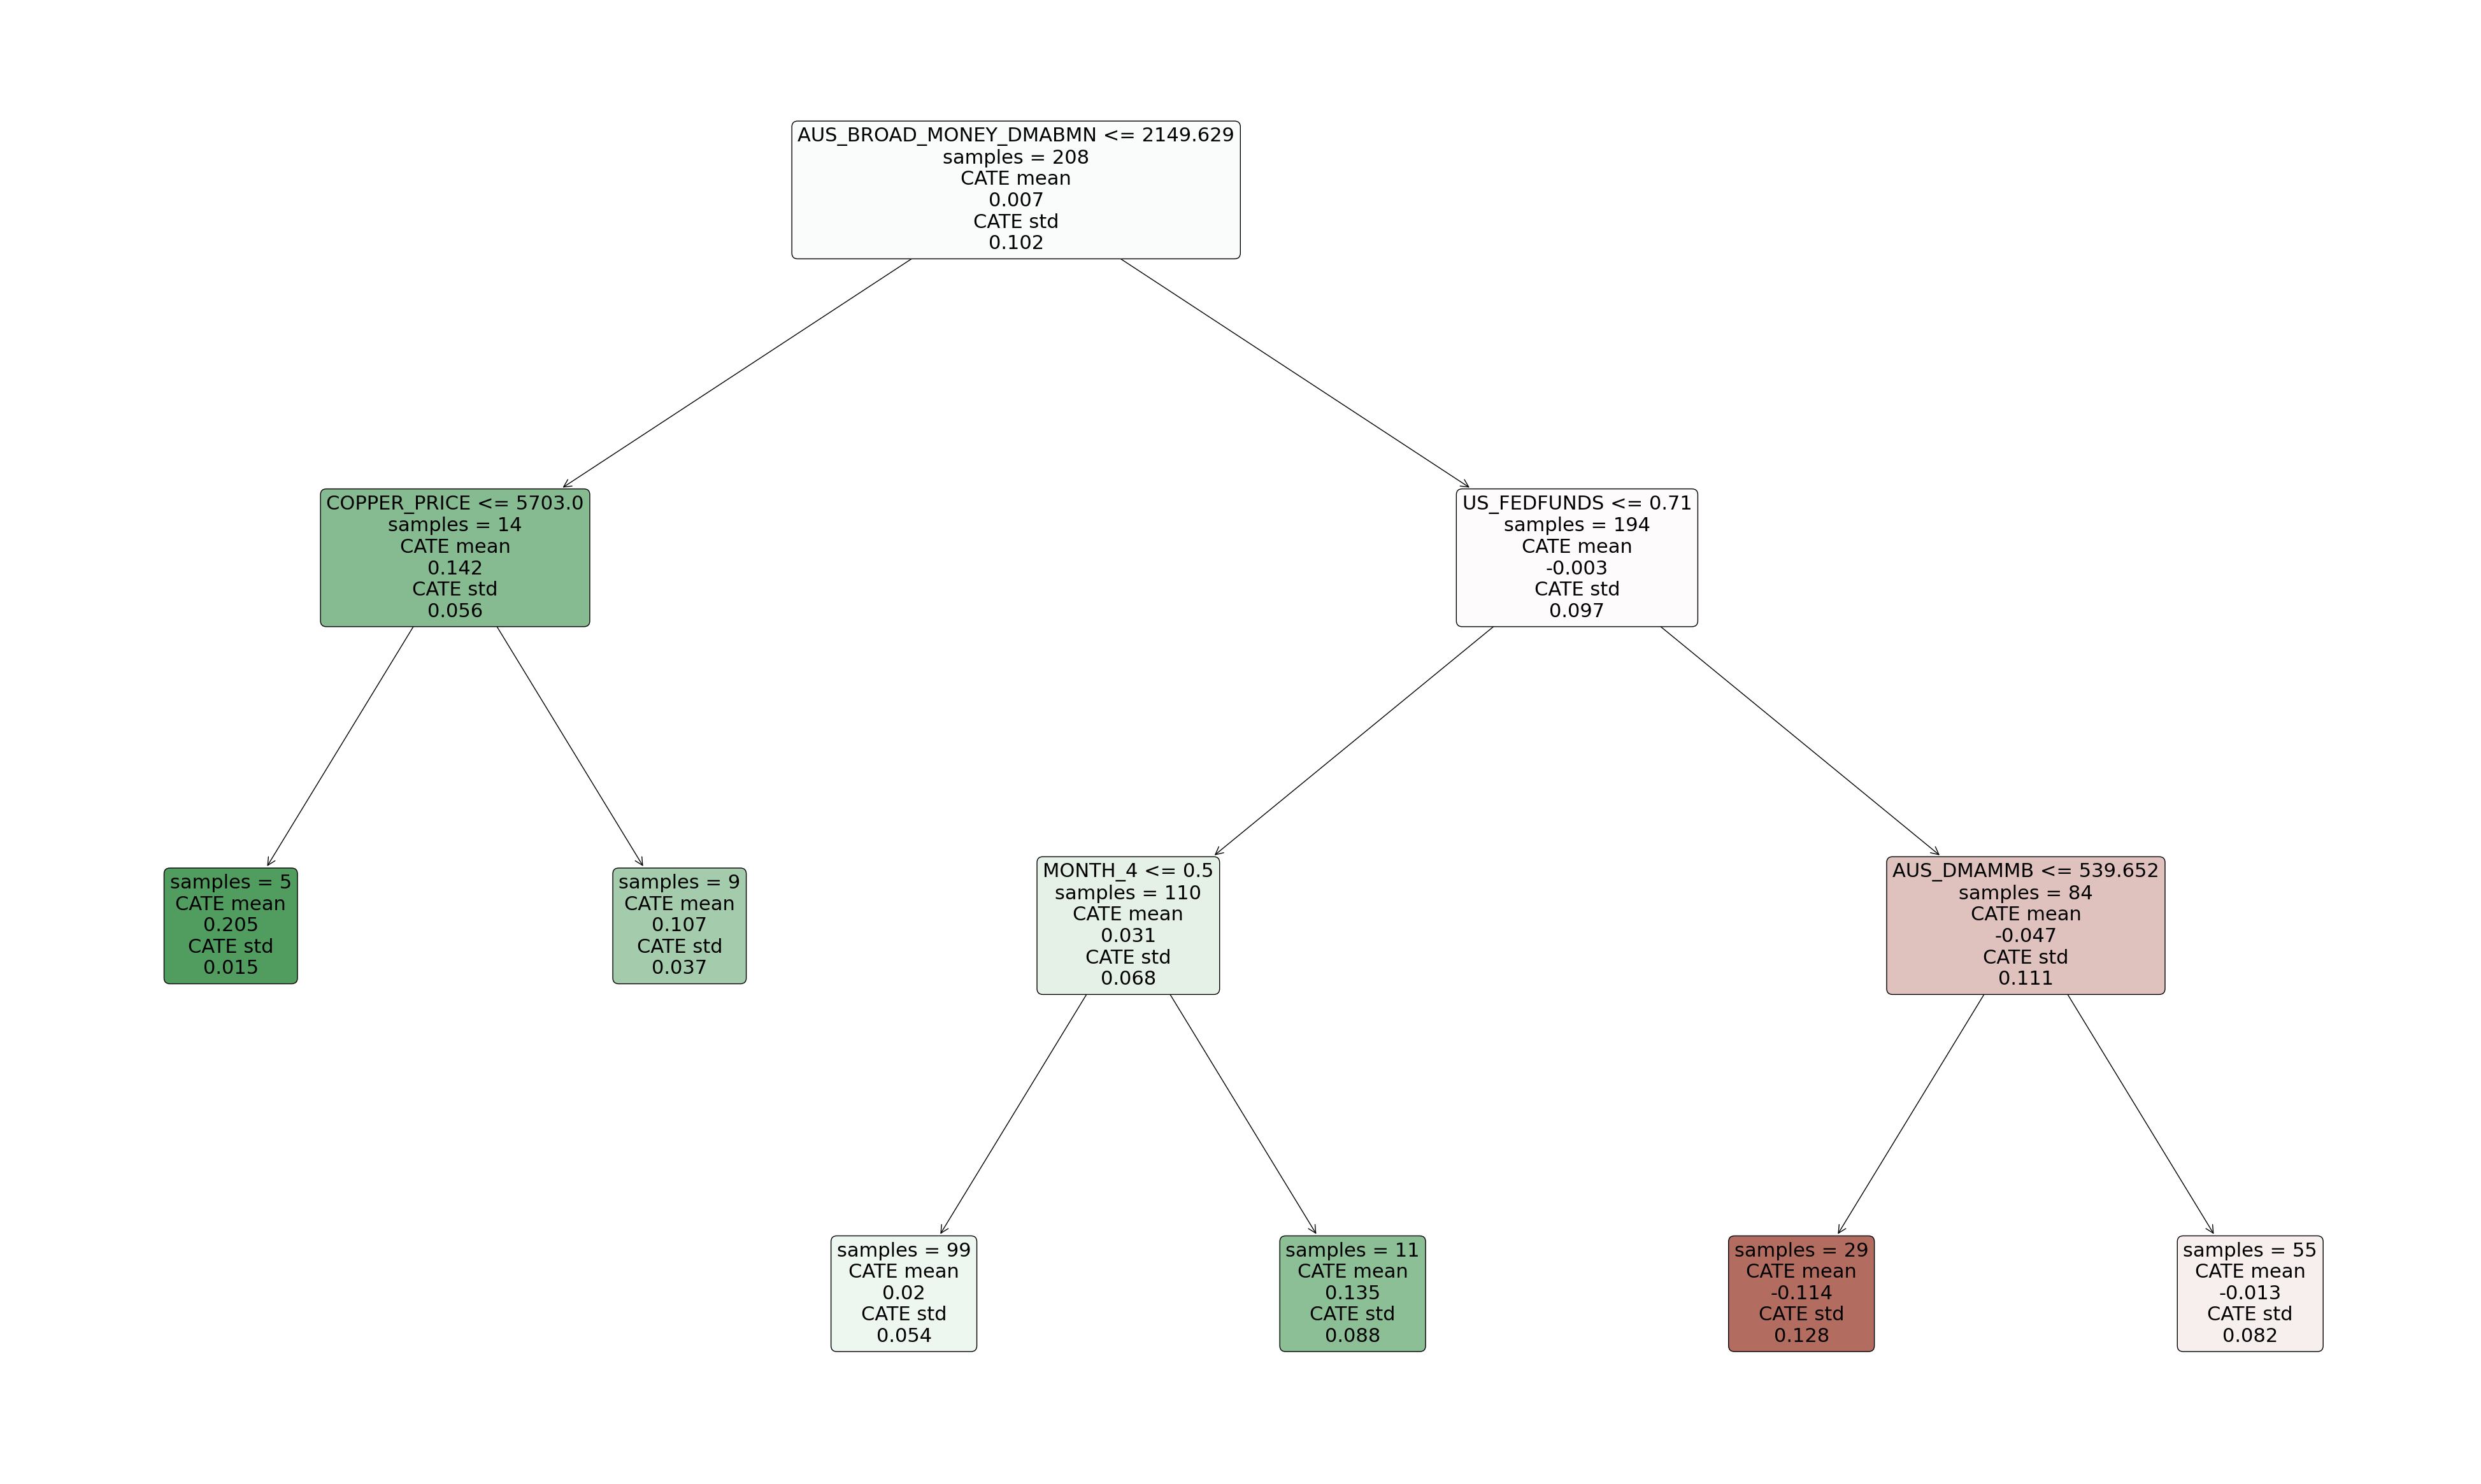

In [120]:
plt.figure(figsize=(50, 30))


causal_analysis.plot_heterogeneity_tree(
    x_test_onehot,
    "IRONORE_PRICE",
    max_depth=3,
    min_impurity_decrease=1e-6,
    min_samples_leaf = 5
)

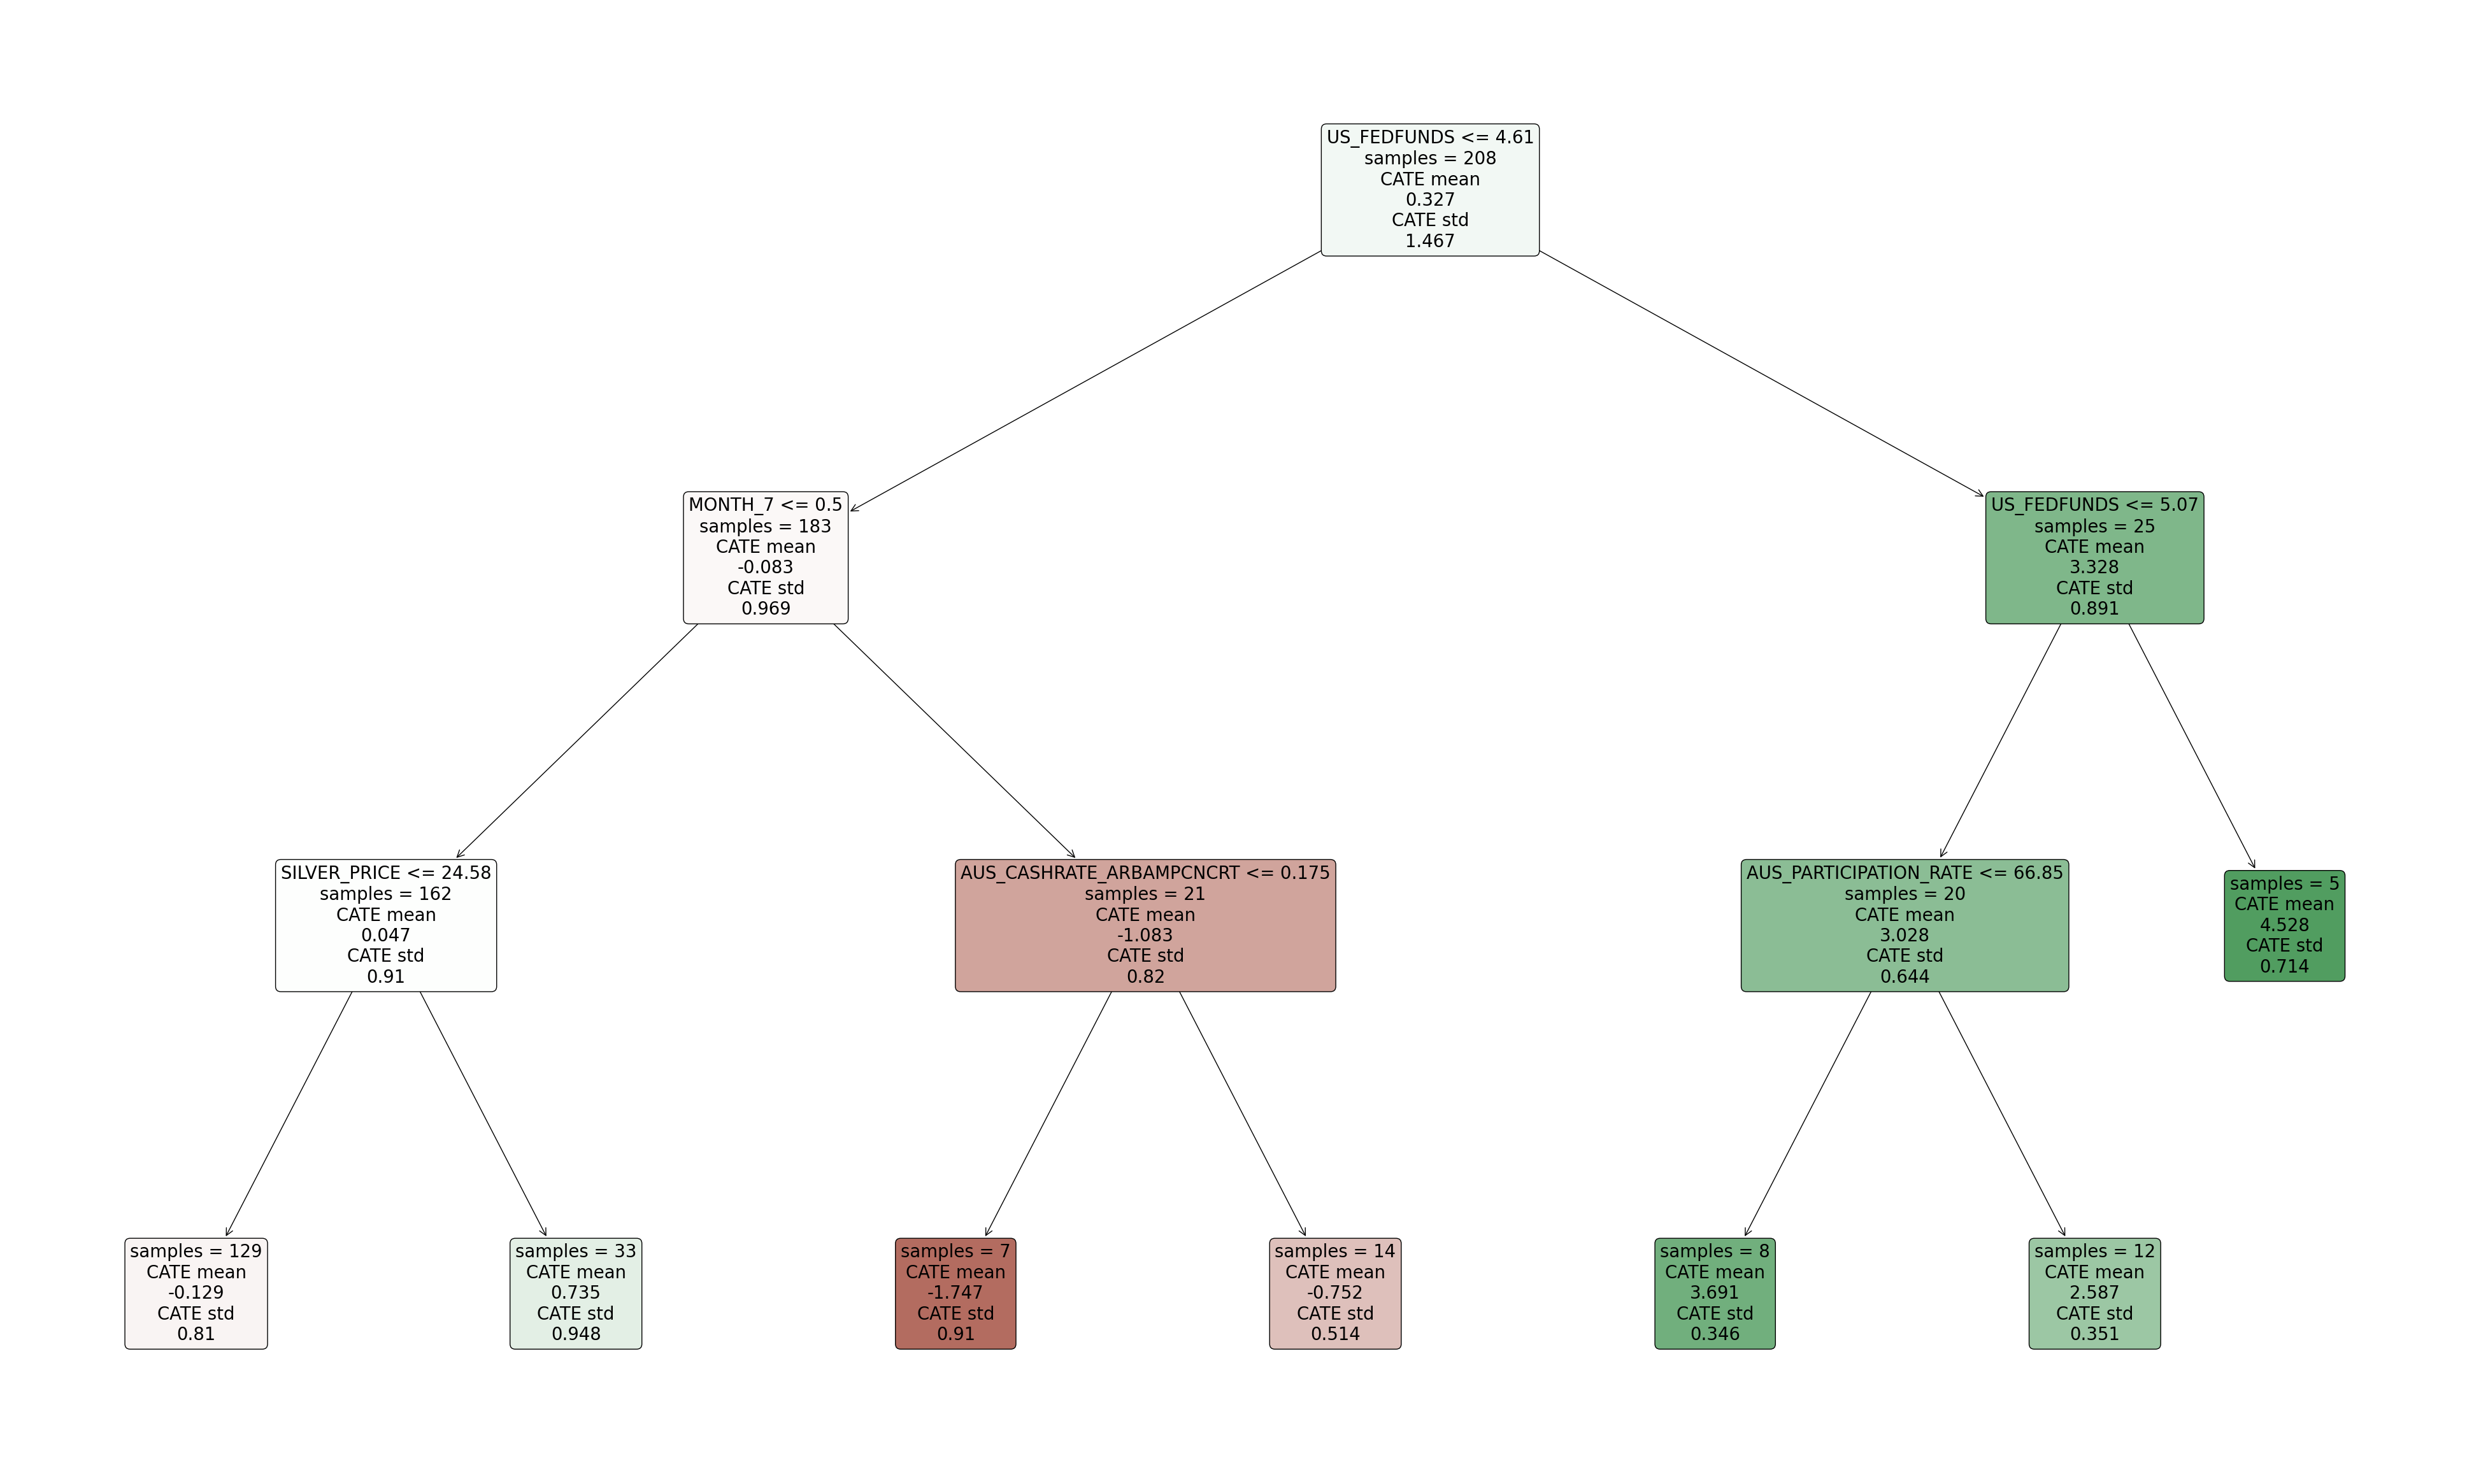

In [ ]:
plt.figure(figsize=(50, 30))


causal_analysis.plot_heterogeneity_tree(
    x_test_onehot,
    "WTI",
    max_depth=3,
    min_impurity_decrease=1e-6,
    min_samples_leaf = 5
)

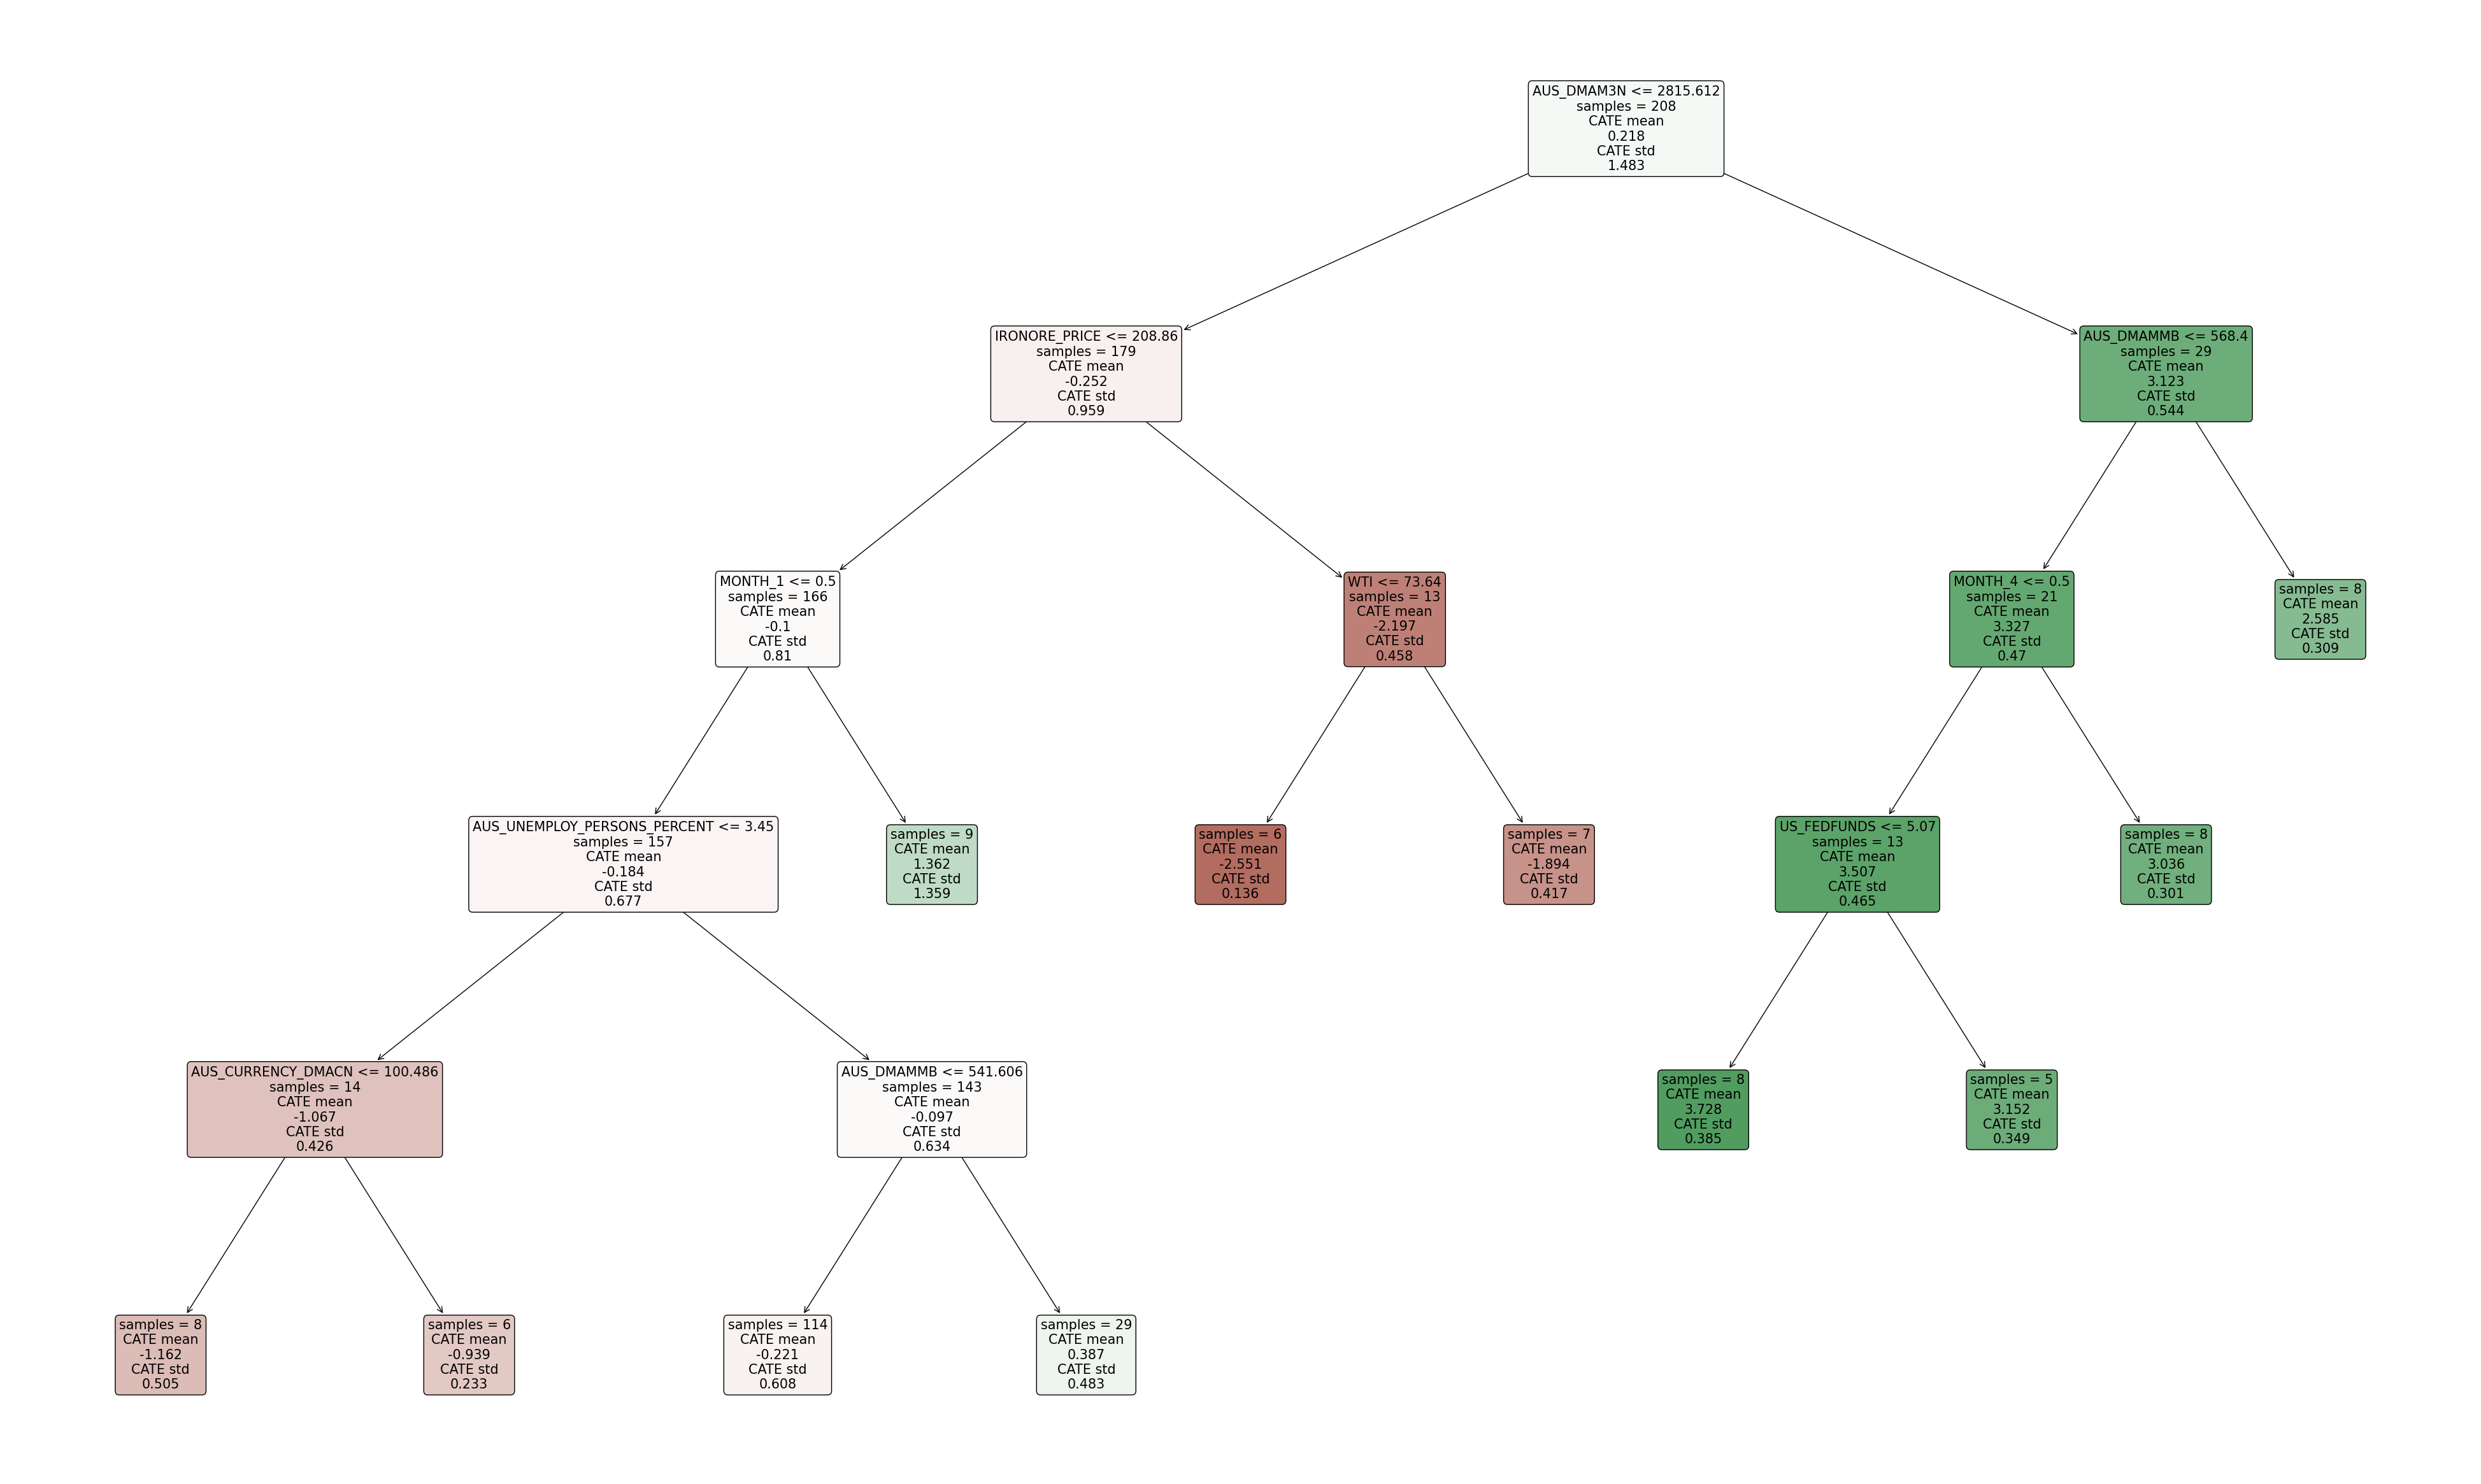

In [ ]:
plt.figure(figsize=(50, 30))


causal_analysis.plot_heterogeneity_tree(
    x_test_onehot,
    "BRENT",
    max_depth=5,
    min_impurity_decrease=1e-6,
    min_samples_leaf = 5
)

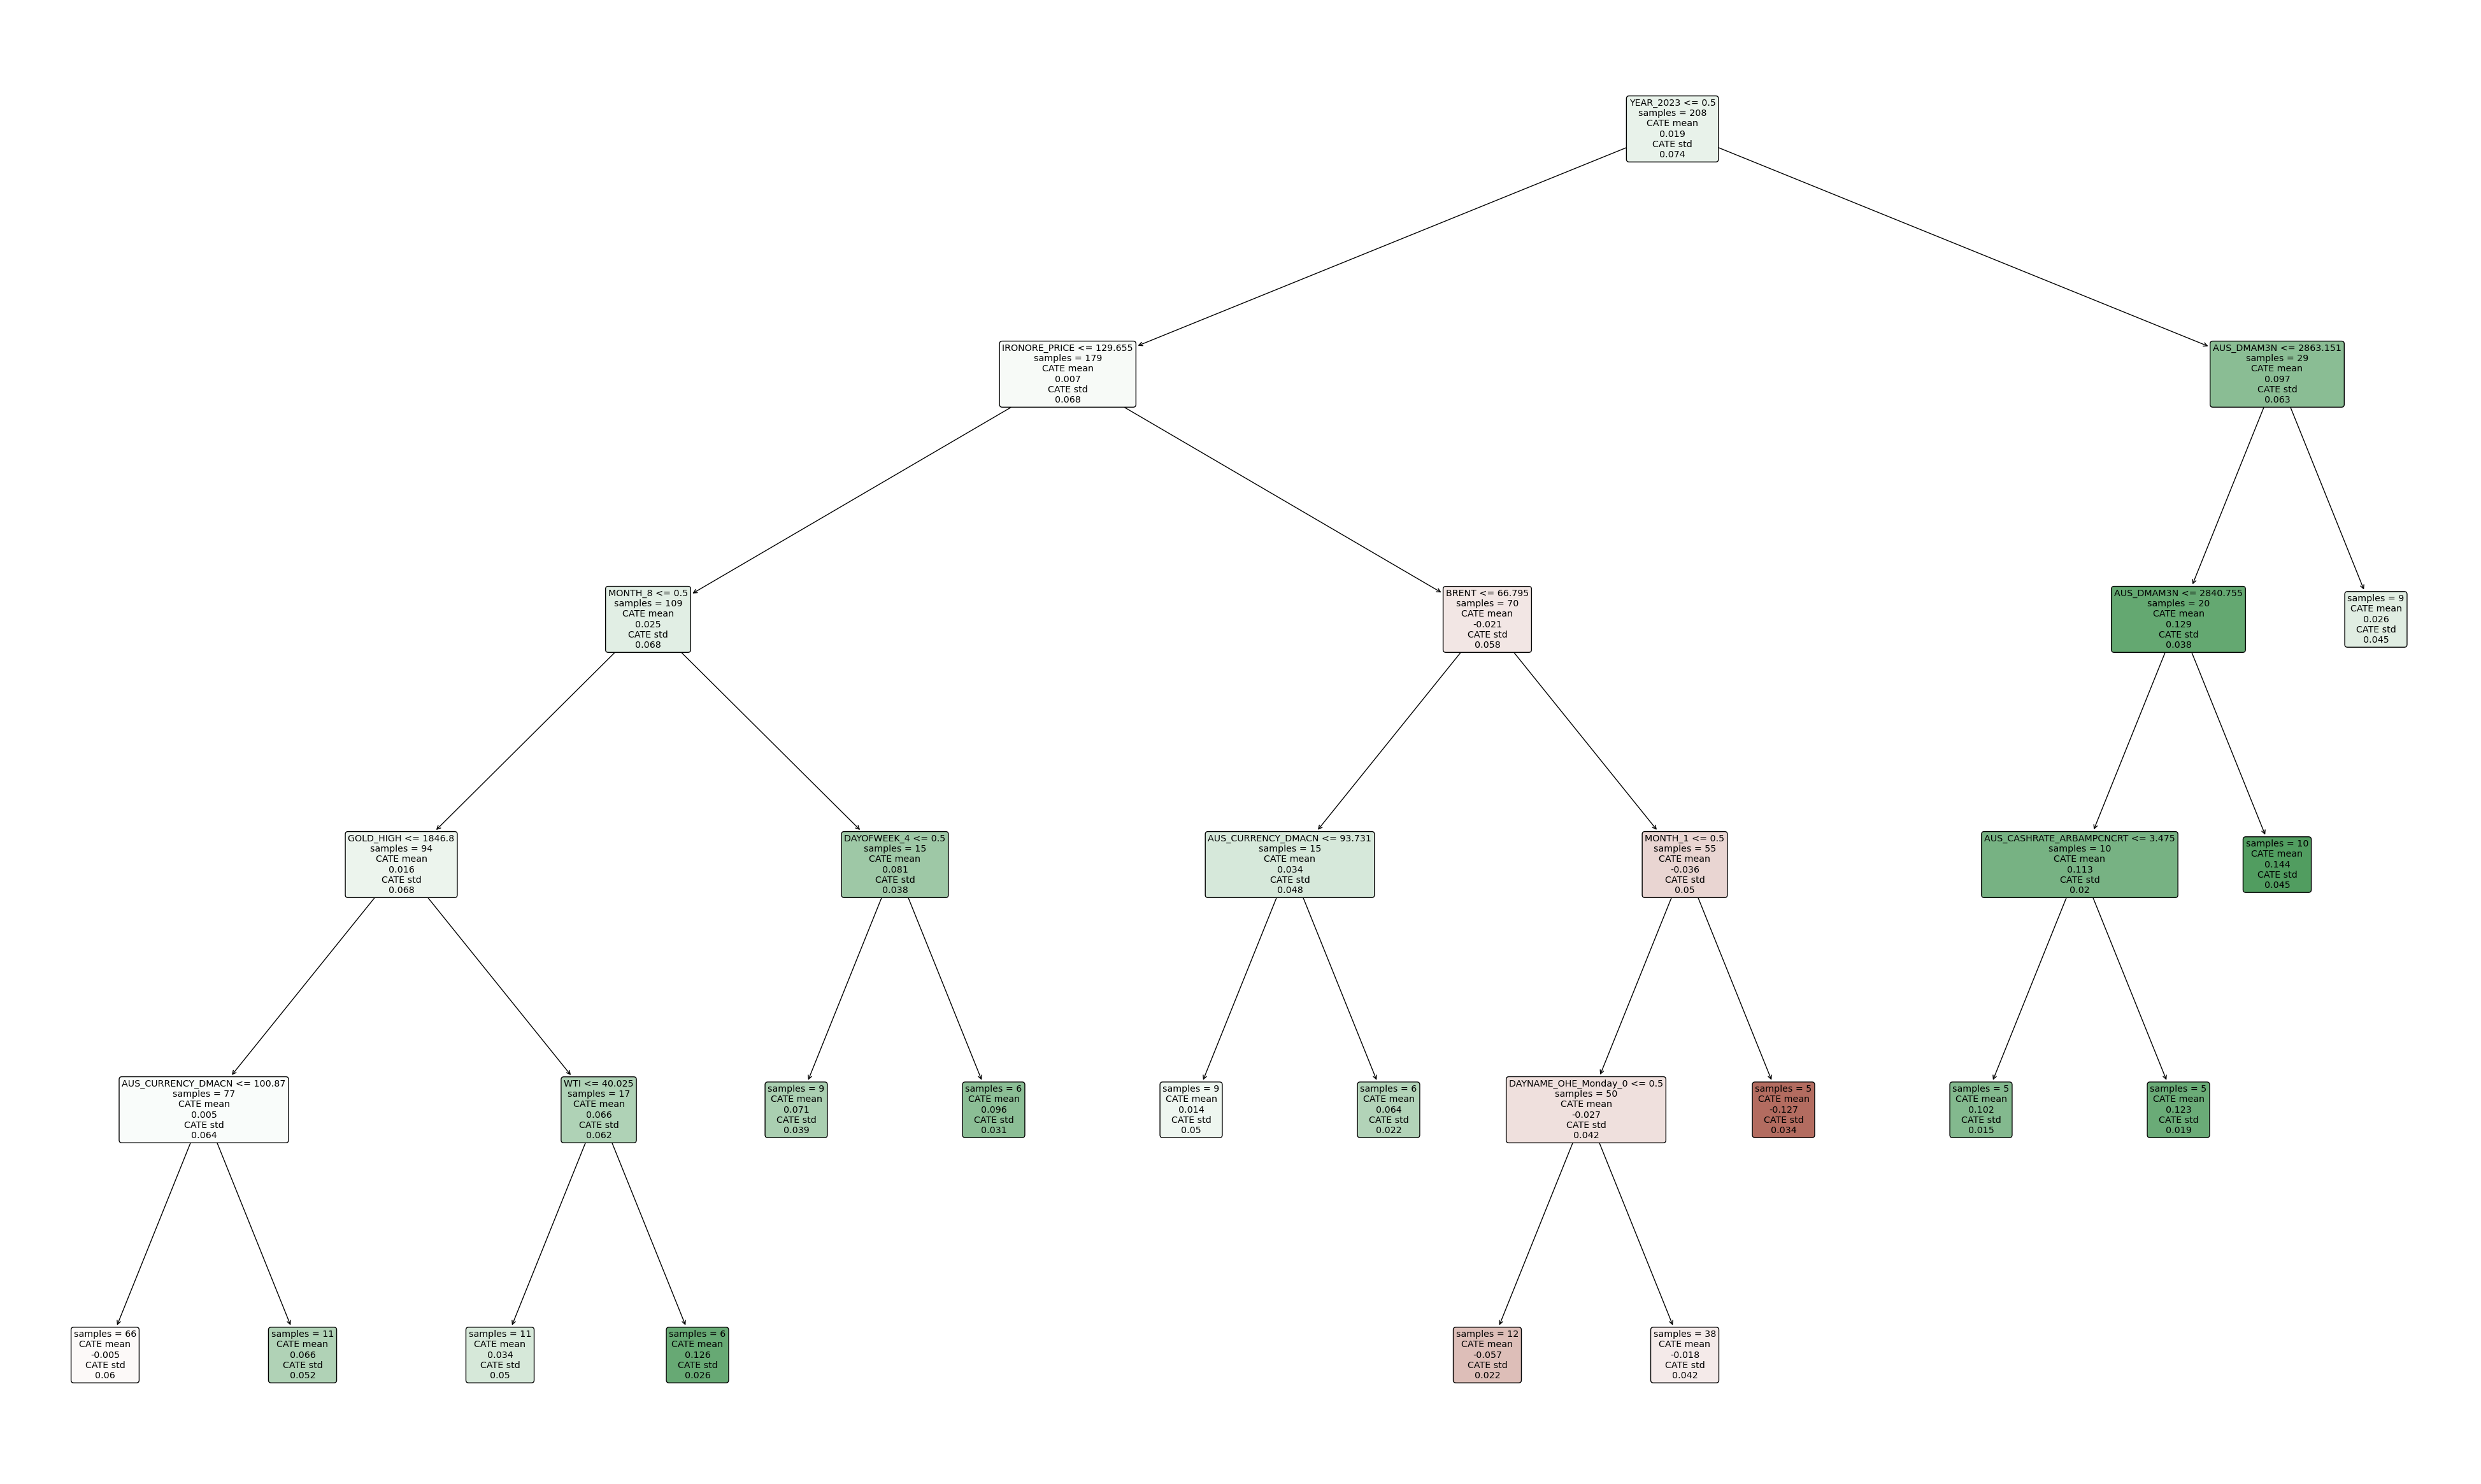

In [ ]:
plt.figure(figsize=(50, 30))


causal_analysis.plot_heterogeneity_tree(
    x_test_onehot,
    "AUS_DMAMMB",
    max_depth=5,
    min_impurity_decrease=1e-6,
    min_samples_leaf = 5
)

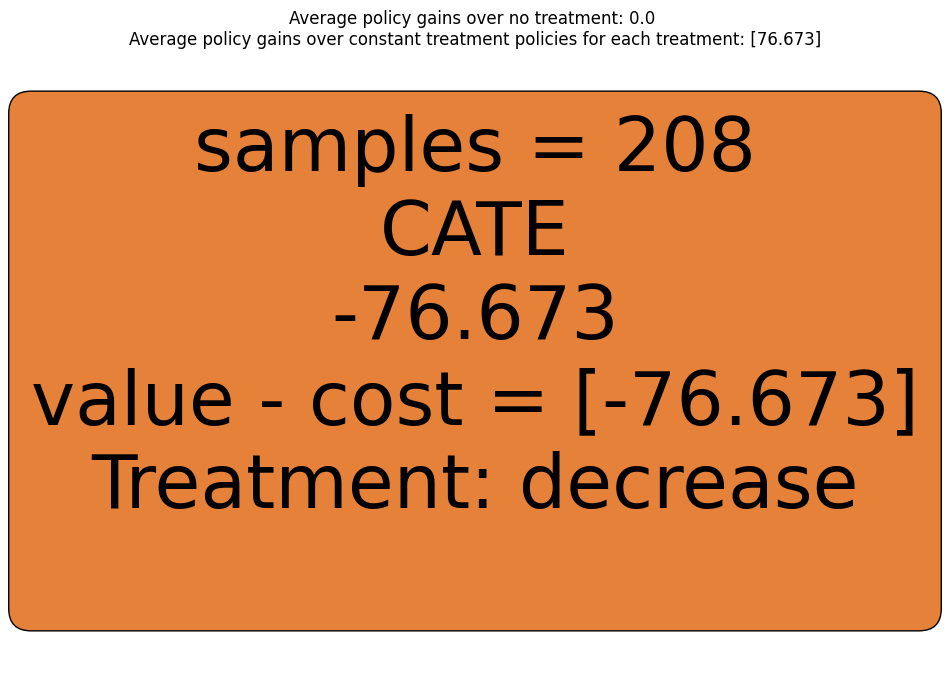

In [ ]:
plt.figure(figsize=(12, 8))

causal_analysis.plot_policy_tree(
    x_test_onehot,
    "WTI",
    treatment_costs=77,
    max_depth=5,
    min_samples_leaf = 5
)

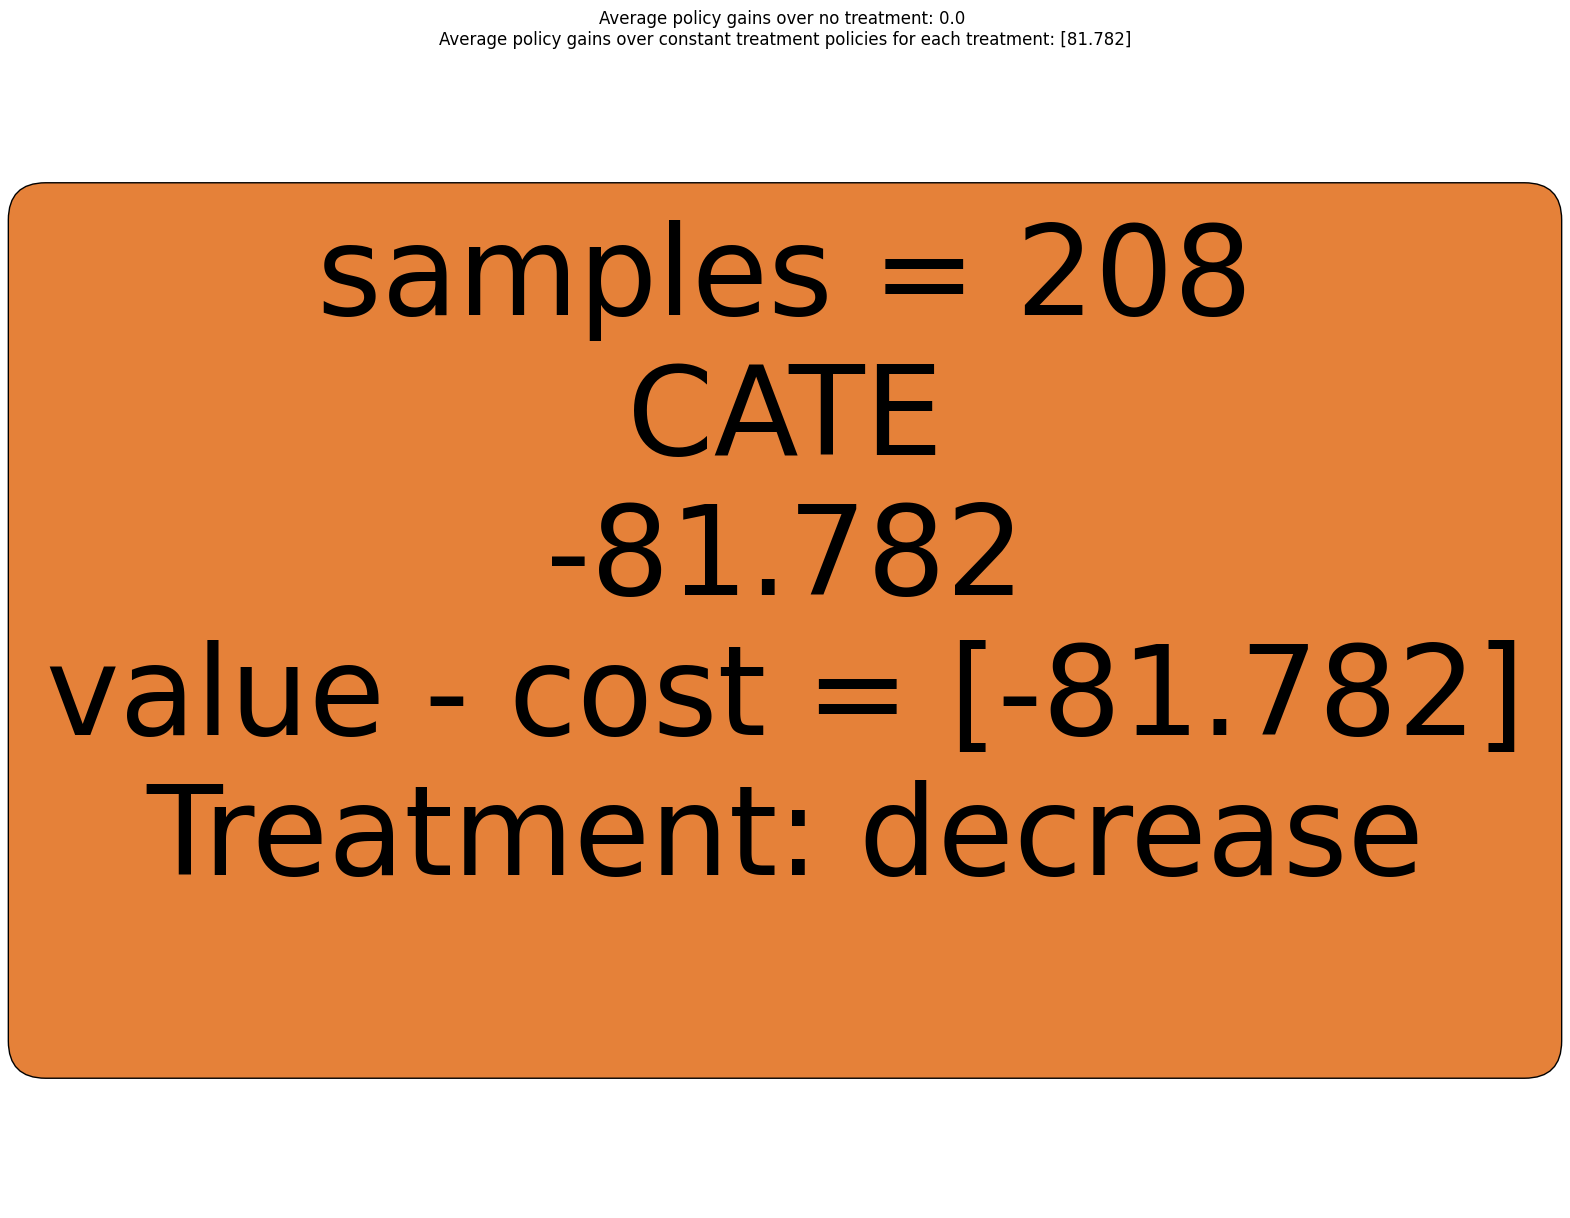

In [ ]:
plt.figure(figsize=(20, 15))


causal_analysis.plot_policy_tree(
    x_test_onehot,
    "BRENT",
    treatment_costs=82,
    max_depth=5,
    min_samples_leaf = 5
)

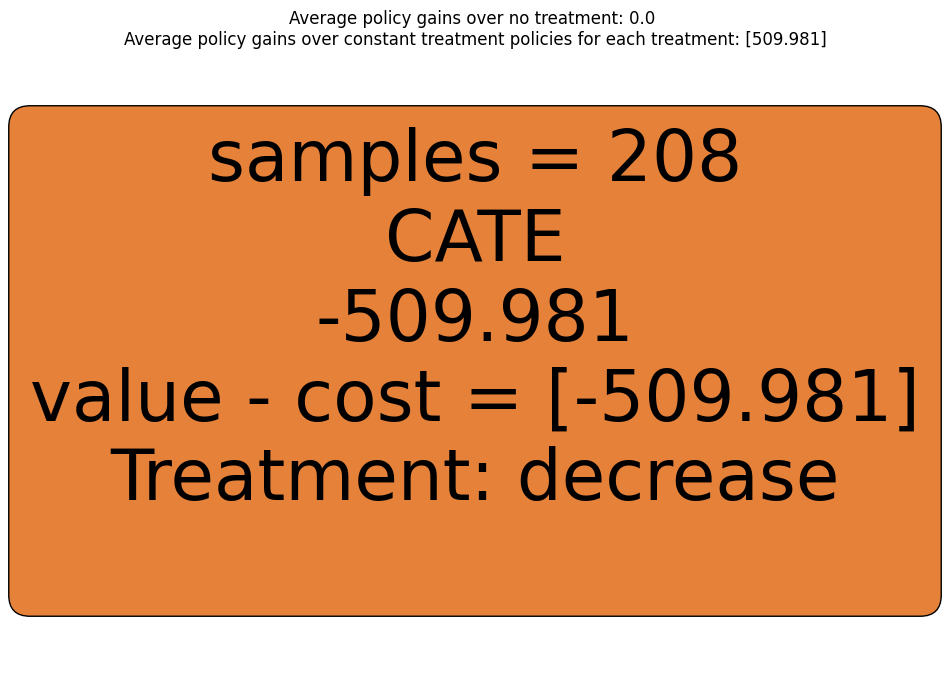

In [ ]:
plt.figure(figsize=(12, 8))


causal_analysis.plot_policy_tree(
    x_test_onehot,
    "AUS_DMAMMB",
    treatment_costs=510,
    max_depth=5,
    min_samples_leaf = 10
)

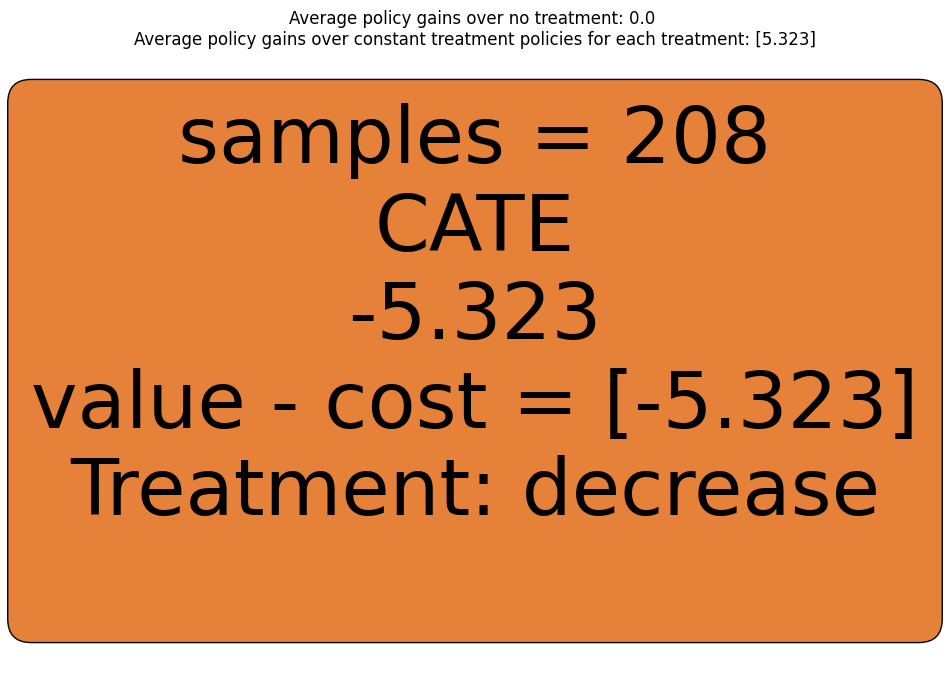

In [121]:
plt.figure(figsize=(12, 8))


causal_analysis.plot_policy_tree(
    x_test_onehot,
    "IRONORE_PRICE",
    treatment_costs=5.33,
    max_depth=5,
    min_samples_leaf = 5
)